# **Problem Statement**

In the ever-evolving banking sector, a profound comprehension of the diverse customer base is essential for tailoring services, enhancing customer satisfaction, and optimizing profitability. This project aims to develop a customer segmentation model that identifies distinct customer segments based on demographic attributes and transactional behaviours, using a dataset comprising over 1 million transactions from more than 800,000 clients. These insights will enable the bank to enhance marketing strategies, improve product offerings, and enrich customer engagement.

According to a report from Ernst & Young, *“A more granular understanding of consumers is no longer a nice-to-have item, but a strategic and competitive imperative for banking providers. Customer understanding should be a living, breathing part of everyday business, with insights underpinning the full range of banking operations.*

# **Objective**

The main goal of this project is to categorize the bank's clients into meaningful groups utilizing their demographic and transactional information. The resulting insights will assist the bank in:
- Identifying lucrative customer segments for targeted marketing
- Understanding regional trends and customer behaviour
- Improving customer experience by customizing services based on segment profiles
- Optimizing product offerings and refining customer retention strategies

# **Dataset**

The dataset comprises over 1 million transactions originating from more than 800,000 customers of an Indian financial institution. It encompasses customer demographic information such as age, location, and gender, along with transaction particulars, including account balances and transaction amounts.

Dataset link: [Bank Data](https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation)

# **Requirements**

In the field of data manipulation and analysis, several essential tools and libraries play vital roles:

* `Pandas` and `NumPy` libraries are necessary for manipulating and analyzing data, especially structured data.

* `Matplotlib` and `Seaborn` help create clear and insightful data visualizations essential for understanding data.

* `Scikit-learn` is crucial for machine learning tasks and includes StandardScaler, which helps standardize features. It also offers various algorithms for model training and evaluation.

* `Principal Component Analysis (PCA)` reduces data dimensions before analysis.

* `KMeans` is essential for clustering, a key unsupervised learning technique.

* `Datapurifier` library helps conduct exploratory data analysis, which is vital in the initial stages of any data science project.

* `SweetViz` is valuable for producing comprehensive data visualizations that provide deep insights into data patterns.

# **Achievements**

The project's success is attributed to effectively segmenting the bank's customer base into distinct clusters based on demographic and transactional data. This segmentation has provided valuable insights into customer groups, enabling the bank to customize marketing strategies, refine product offerings, and improve overall customer engagement.

Key milestones included Data Cleaning and Preprocessing, Dimensionality Reduction using PCA, Customer Segmentation through K-means clustering, and Cluster Analysis to highlight critical customer attributes.

The project also involved:
1. Formulating targeted marketing strategies for each customer segment.
2. Identifying business opportunities for each cluster.
3. Exporting the segmented dataset and individual clusters for advanced analysis and utilization by the bank.

These achievements provide a comprehensive understanding of the customer base, enabling the bank to make data-driven decisions to enhance customer satisfaction and profitability.

# Install modules


 - `sweetviz`
 - `data-purifier`


In [43]:
!pip install sweetviz
!pip install data-purifier

# **Import necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.decomposition import PCA
import datapurifier as dp
from datapurifier import Mleda
from sklearn.metrics import silhouette_score
from itertools import pairwise
import sweetviz as sv
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# **Load the data**

In [ ]:
bank_data = pd.read_csv('/content/bank_transactions.csv')
bank_data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


# **EDA**

## Performing automatic EDA using *`Mleda`*

In [ ]:
eda = Mleda(bank_data)
print(eda)

Shape of DataFrame:  (1048567, 9)

Sample of Dataframe:


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
71275,T71276,C8228122,14/1/75,M,BAREILLY,2.64,2/8/16,63059,158.55
1026015,T1026016,C7836585,4/2/92,M,SINGHWARA,32300.24,13/9/16,150038,35.00
884234,T884235,C3137144,21/2/78,M,NAVI MUMBAI,156004.91,7/9/16,204435,425.00
377749,T377750,C2710953,15/10/92,F,BURDWAN,11946.39,13/8/16,122724,1270.00
97388,T97389,C8026071,20/4/90,M,KOLKATA,7454.36,1/8/16,184359,260.00
536141,T536142,C7124053,6/7/91,F,DELHI,31022.31,24/8/16,231516,50.00
1037110,T1037111,C2981841,27/3/90,M,LUCKNOW,5389.98,18/9/16,152710,200.00
315862,T315863,C3818580,1/6/76,M,AURANGABAD,73370.74,10/8/16,193652,7600.00
157392,T157393,C7453841,5/2/84,M,HYDERABAD,323348.91,3/9/16,150654,500.00
713255,T713256,C4126853,19/1/93,M,NOIDA,6343.91,3/9/16,175317,30.00



There are total 6 categorical and 3 numerical columns

Description of Data:



,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


Information regarding data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


None


Null Information of Dataframe: 


There are total 4 columns having null values out of 9 columns in dataframe



,column_name,null_rows,null_percentage
0,CustomerDOB,3397,0.323966
1,CustAccountBalance,2369,0.225927
2,CustGender,1100,0.104905
3,CustLocation,151,0.014401


## *Checking for outliers*

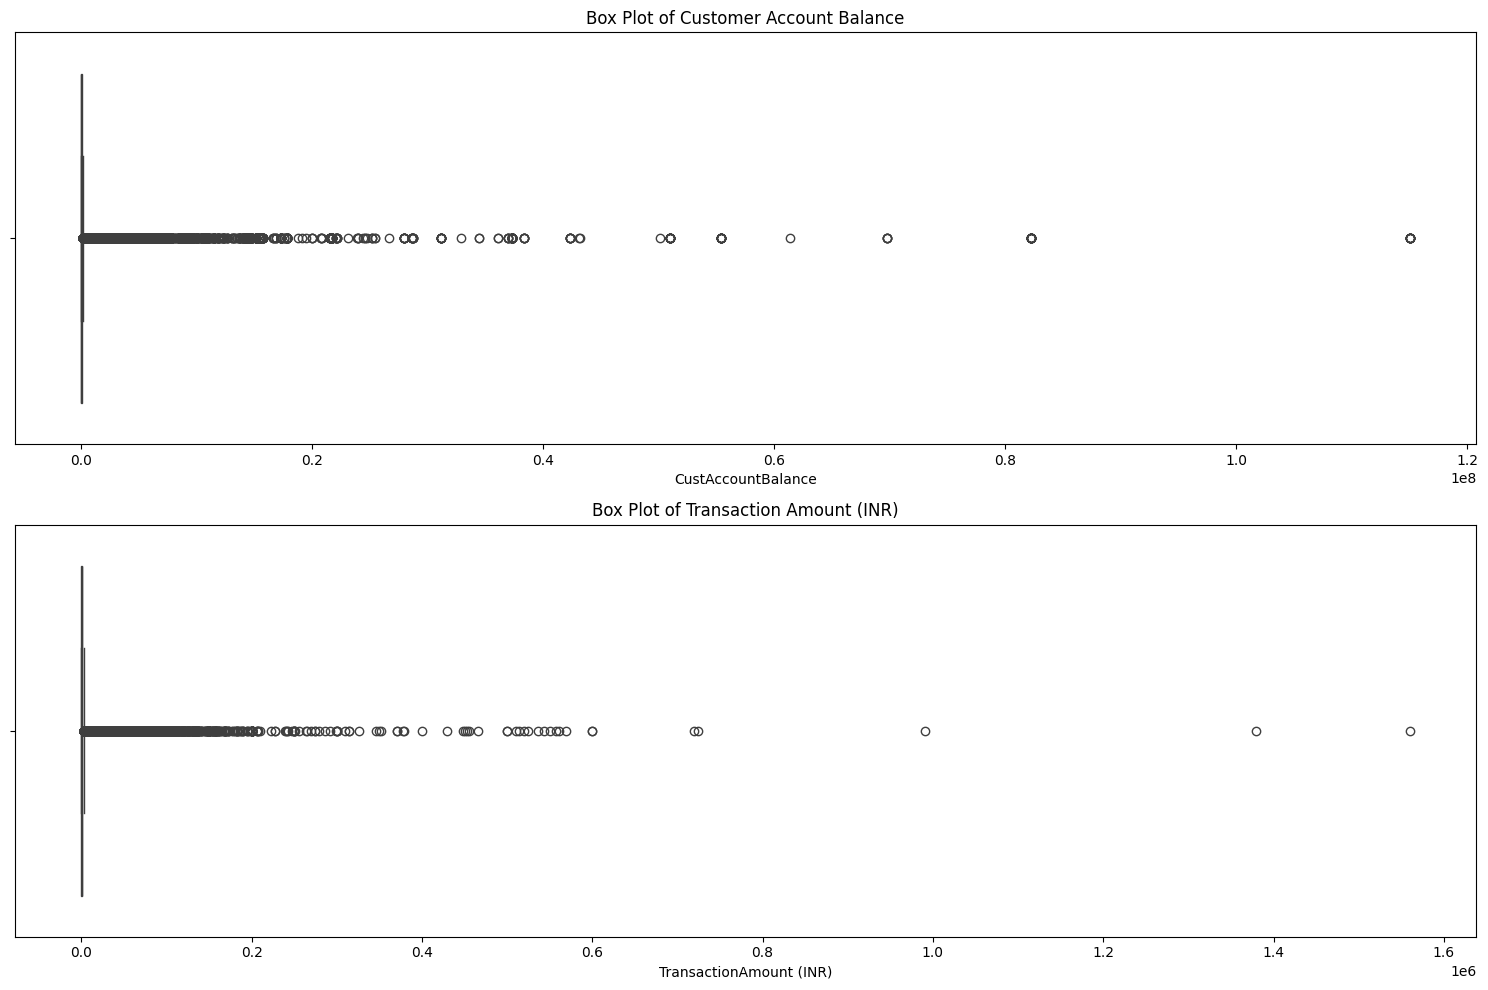

In [ ]:
# Checking for outliers in numerical columns using box plots
plt.figure(figsize=(15, 10))

# Subplot for CustAccountBalance
plt.subplot(2, 1, 1)
sns.boxplot(x=bank_data['CustAccountBalance'])
plt.title('Box Plot of Customer Account Balance')

# Subplot for TransactionAmount (INR)
plt.subplot(2, 1, 2)
sns.boxplot(x=bank_data['TransactionAmount (INR)'])
plt.title('Box Plot of Transaction Amount (INR)')

plt.tight_layout()
plt.show()

# Data Visualization

## Automatic data visualization using *`SweetViz`*

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



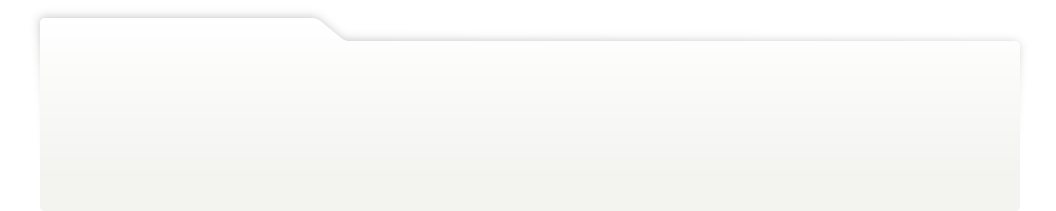
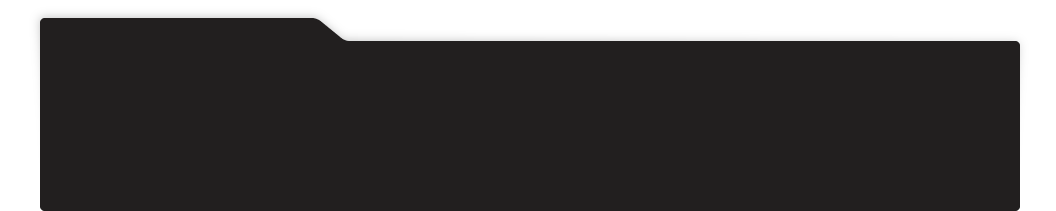
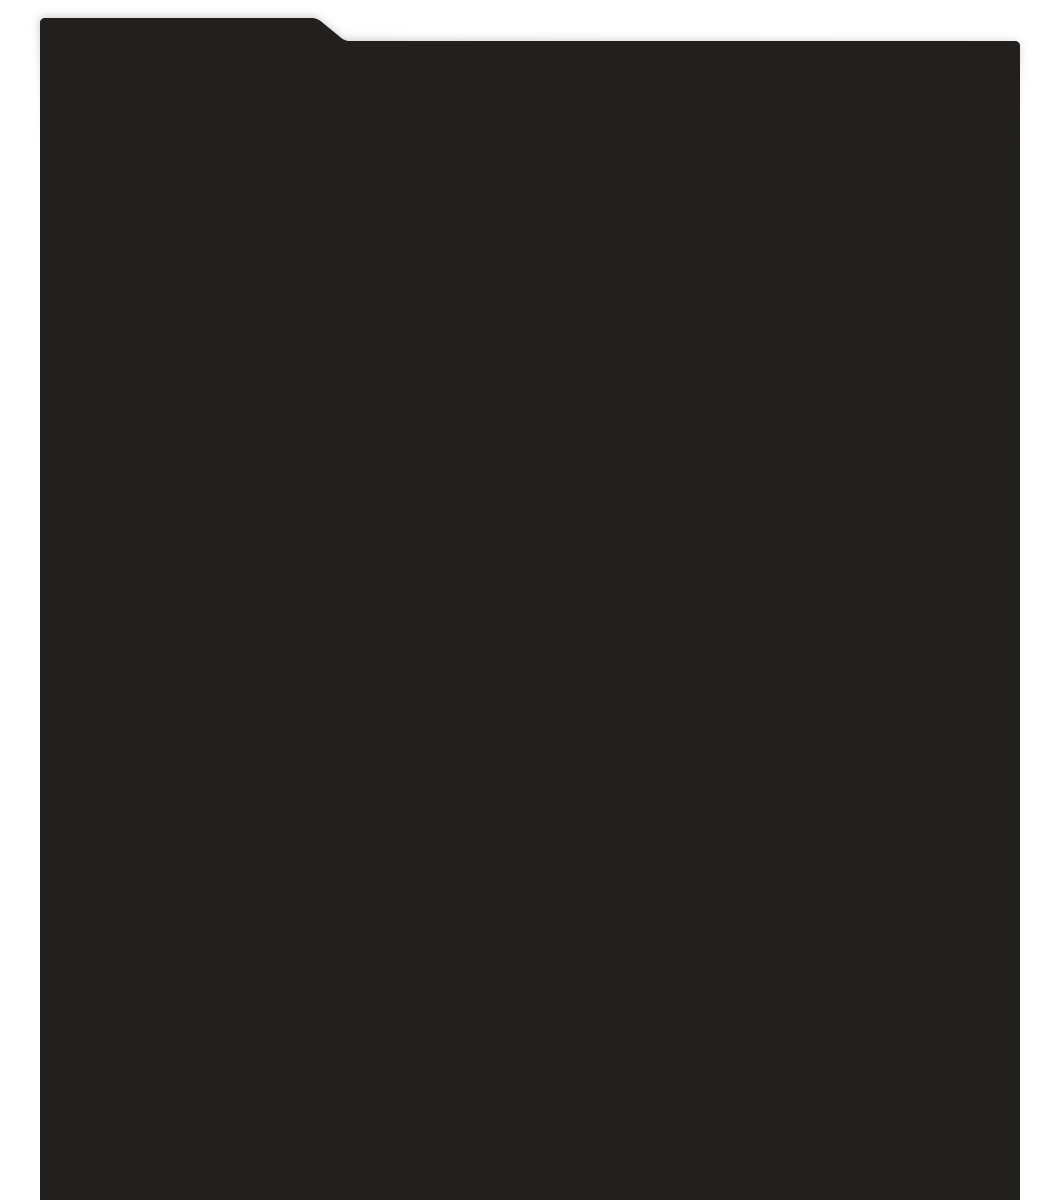
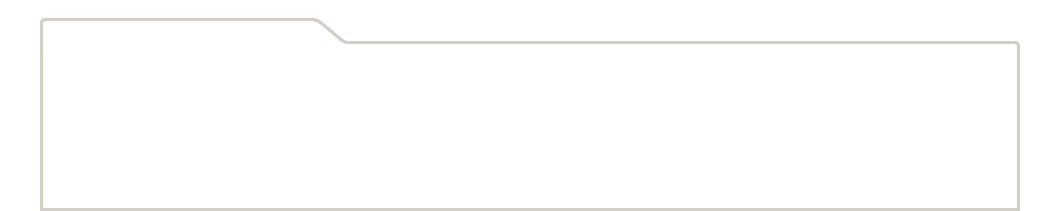
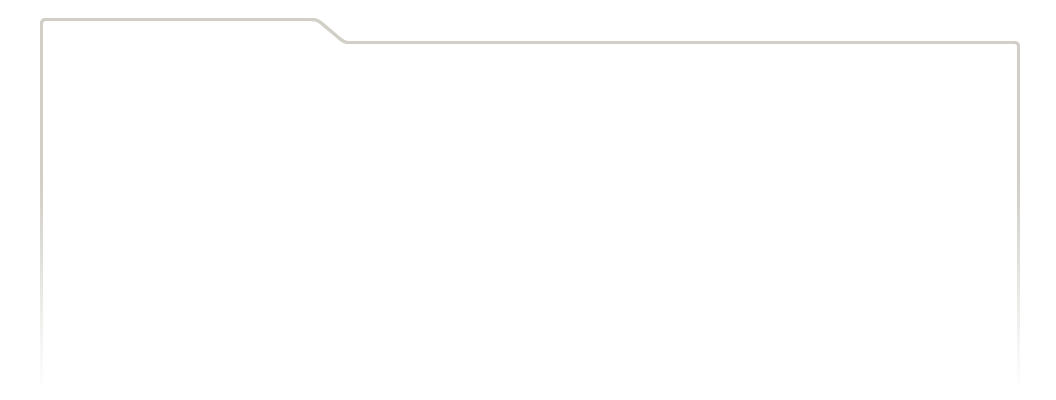
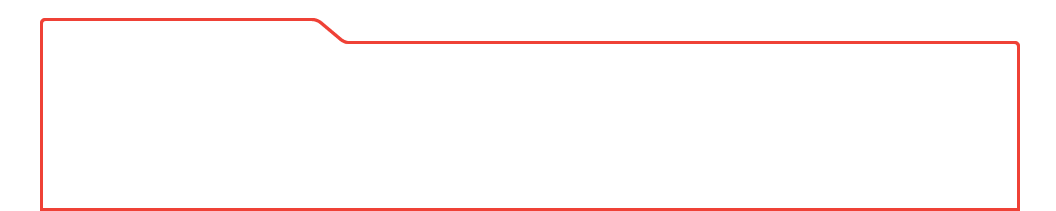
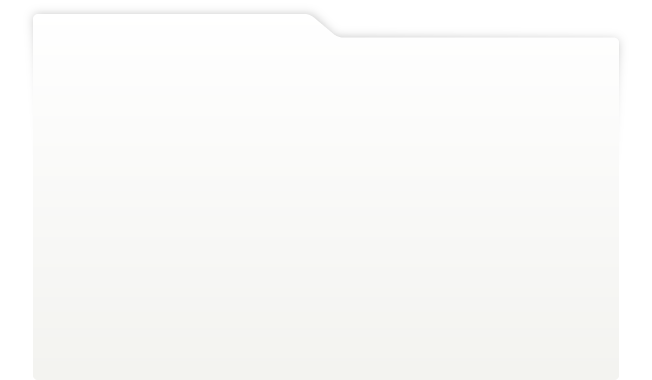
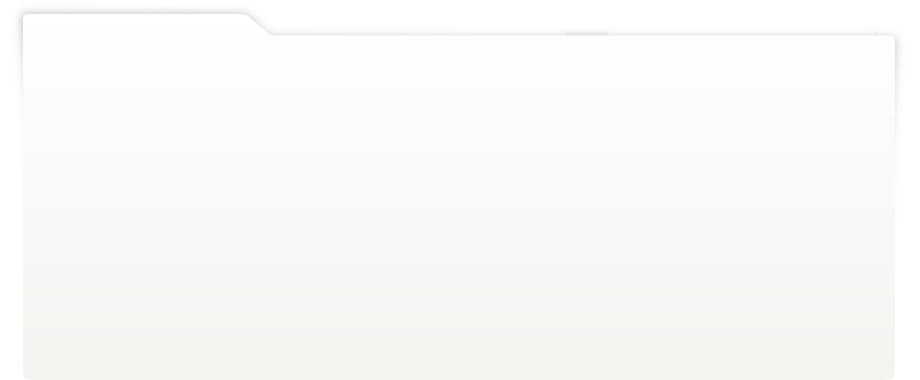
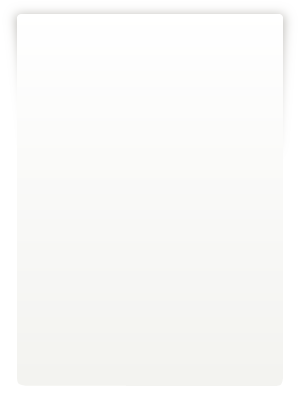
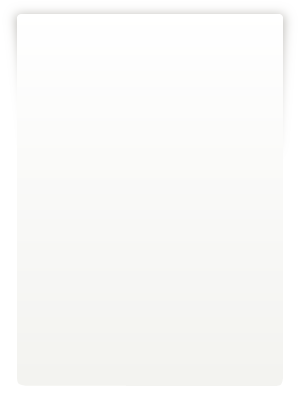
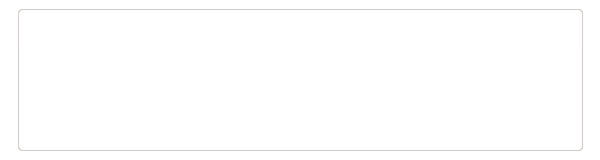
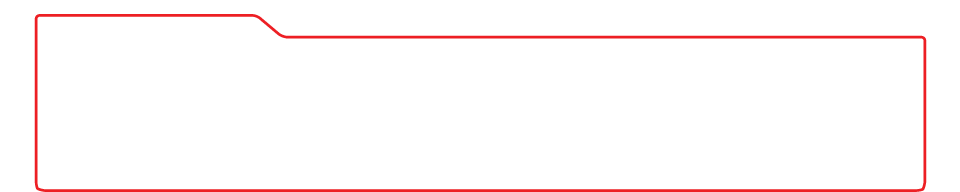
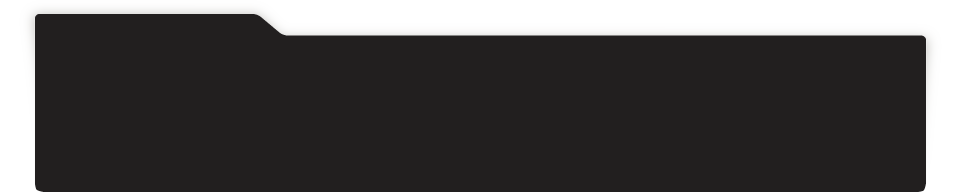
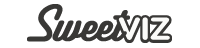
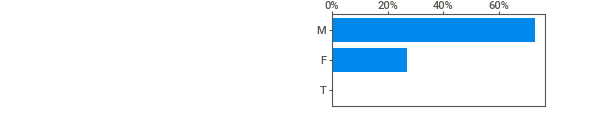
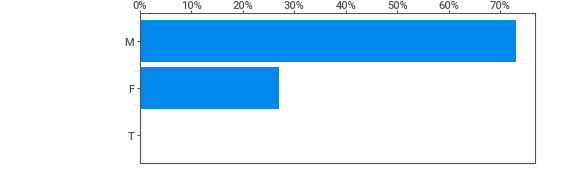
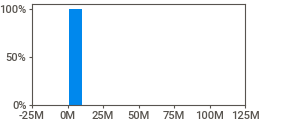
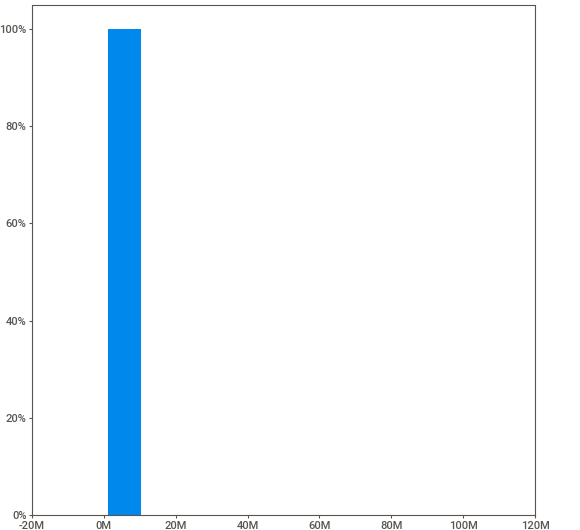
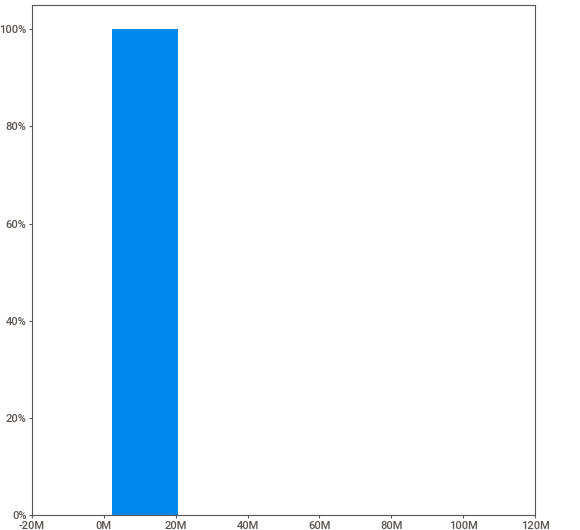
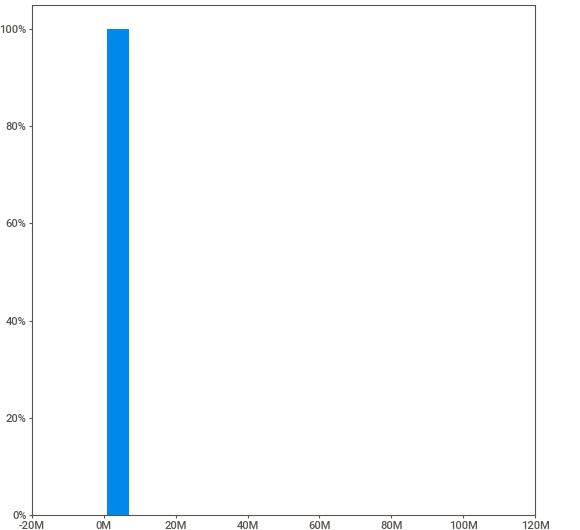
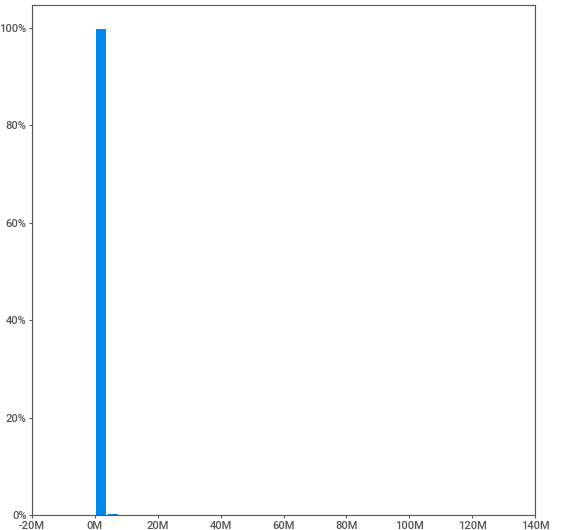
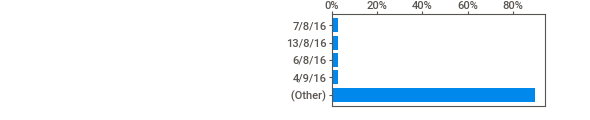
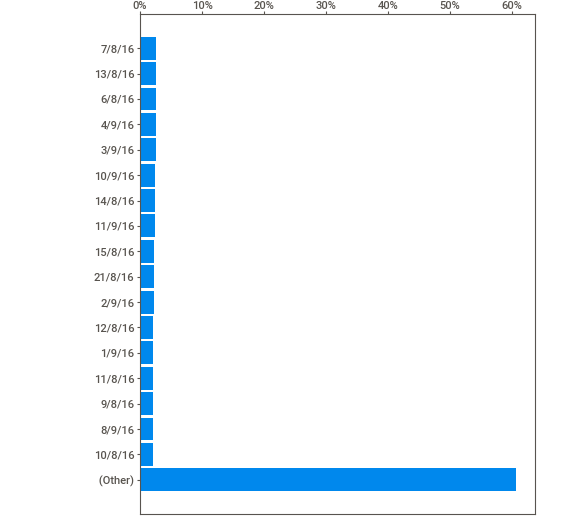
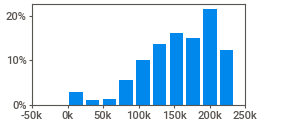
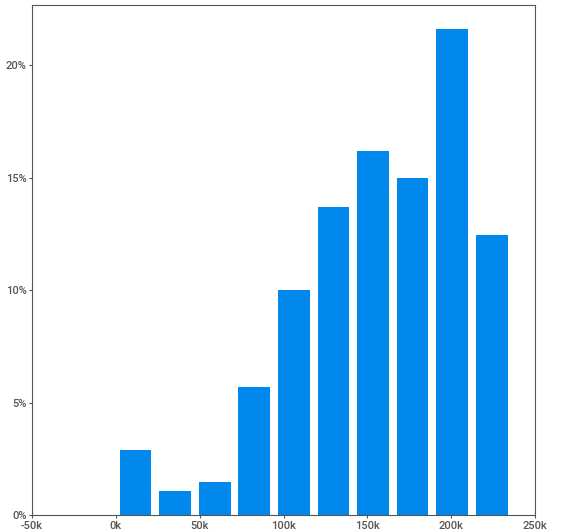
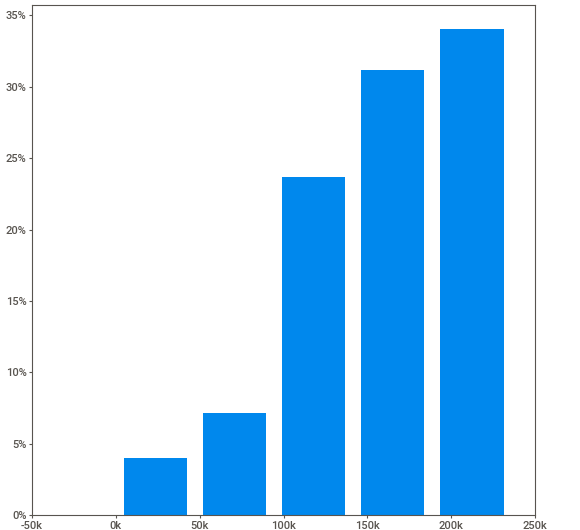
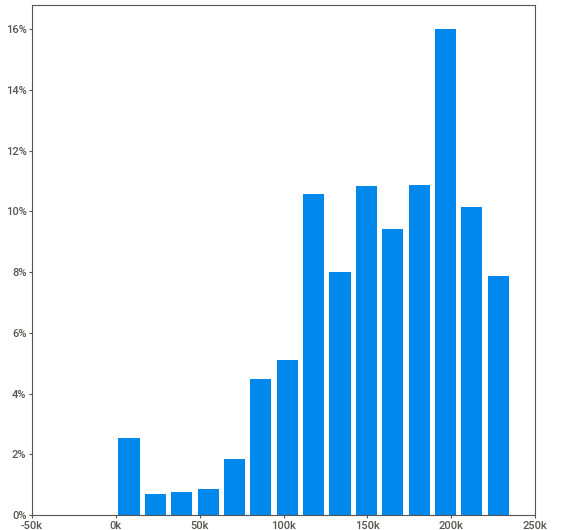
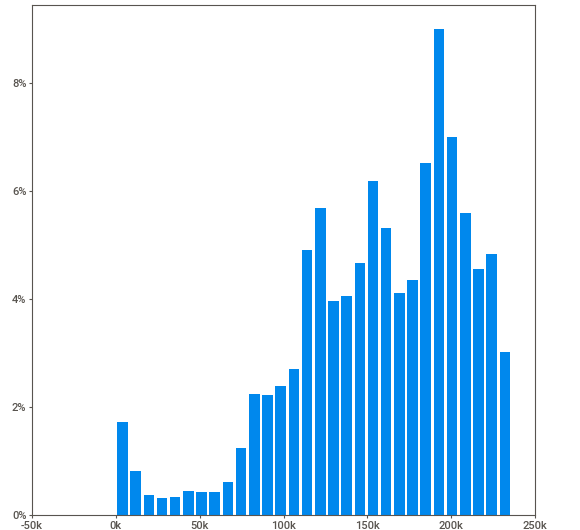
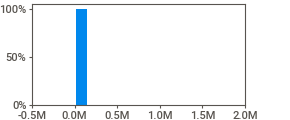
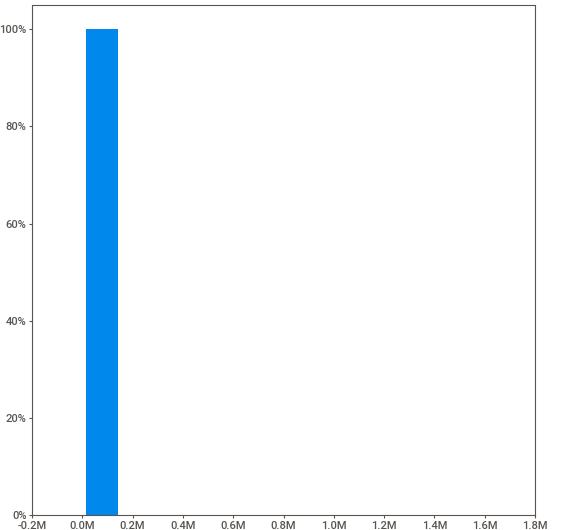
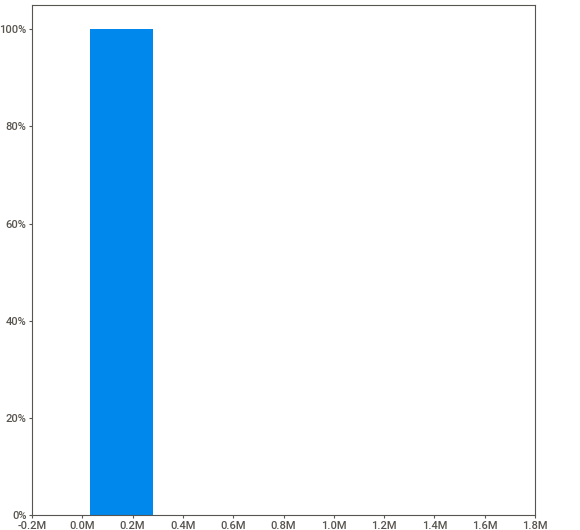
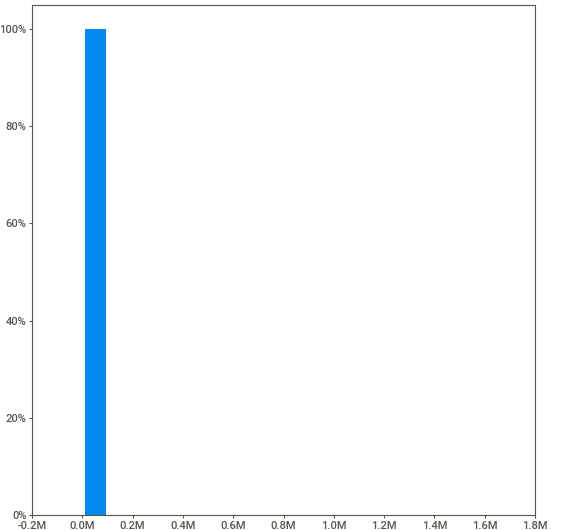
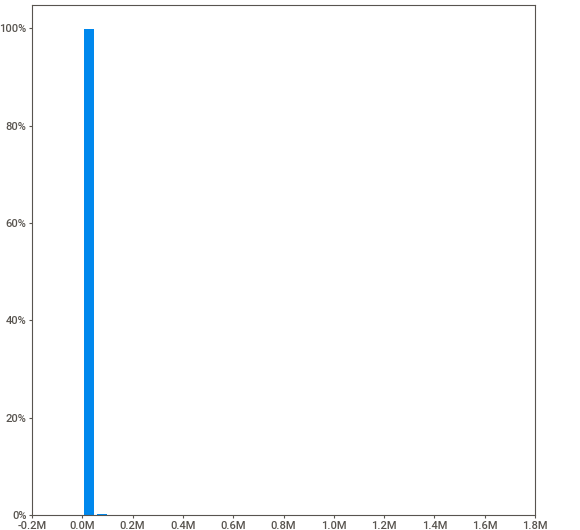
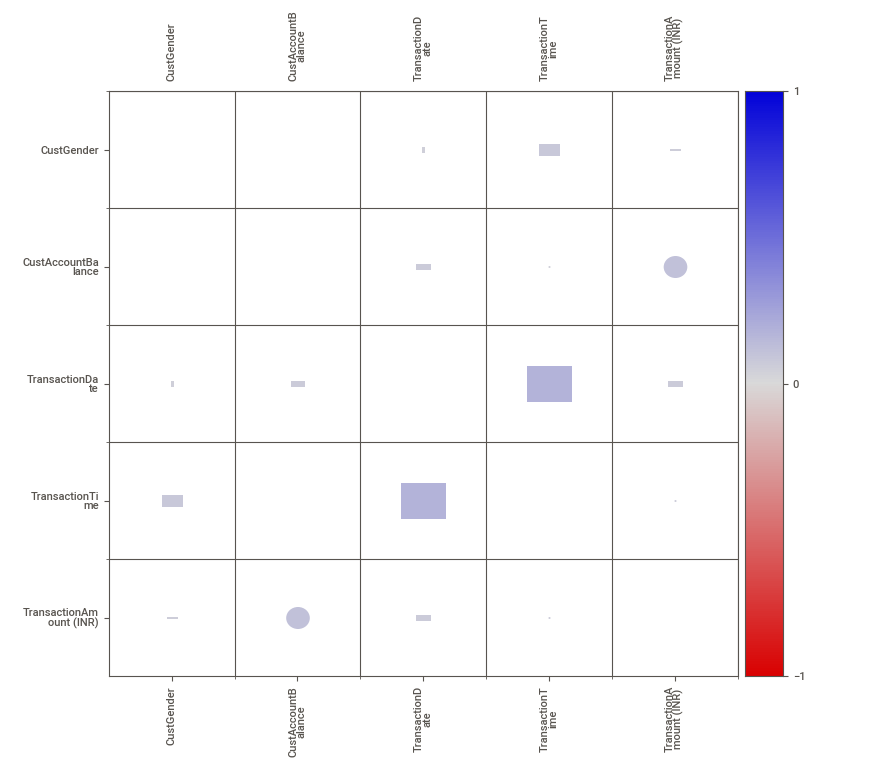
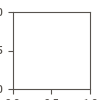

In [ ]:
bank_swtvz = sv.analyze(source=bank_data,
                       pairwise_analysis='on'
                       )

bank_swtvz.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"
bank_swtvz.show_notebook()

## **EDA Insights**

Here are the insights from the Exploratory Data Analysis (EDA):

1. Shape:

  The dataset contains `1,048,567 rows` and `9 columns`.

2. Missing Values:

  `CustomerDOB`: 3397 missing values.

  `CustGender`: 1100 missing values.

  `CustLocation`: 151 missing values.

  `CustAccountBalance`: 2369 missing values.


3. Data Types:

  Besides columns for `CustAccountBalance` and `TransactionAmount (INR)` which are `float64`, and `TransactionTime` which is `int64`, the rest of the columns are of datatype `object`.


4. Categorical Variables:

   `CustGender`: The male count is higher than female.

   `CustLocation`: The top location is Mumbai.


5. Outliers:

  Significant outliers are present in both `CustAccountBalance` and `TransactionAmount (INR)`.


6. Duplicates:

 There are no duplicate rows in the dataset.

7. Numerical Variables:

  `CustAccountBalance`: Highly skewed distribution with a few customers having very high account balances.

  `TransactionAmount (INR)`: Skewed distribution with a few transactions having very high amounts.


*  **These insights will provide guidance for the next steps in data cleaning and preprocessing before building the customer segmentation model.**

# Data Cleaning

### Creating copy of data

In [ ]:
# Creating copy of data for data manipulation and model testing

bank_df = bank_data.copy()


In [ ]:
#dropping null values

bank_df.dropna(inplace=True)

# Converting TransactionDate column to datetime format

bank_df['TransactionDate'] = pd.to_datetime(bank_df['TransactionDate'], errors='coerce')

# Converting CustomerDOB column to datetime format

bank_df['CustomerDOB'] = pd.to_datetime(bank_df['CustomerDOB'], errors='coerce')

#Displaying cleaned dataset

bank_df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


In [ ]:
eda1 = Mleda(bank_df)
print(eda1)

Shape of DataFrame:  (1041614, 9)

Sample of Dataframe:


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
272418,T272419,C4442464,1974-11-07,M,LUCKNOW,2108.32,2016-11-08,91824,1500.00
484825,T484826,C2979845,1988-01-24,M,NEW DELHI,10651.64,2016-08-20,73544,25.00
171365,T171366,C4223381,1980-04-09,M,BAREILLY,1216.29,2016-04-08,161342,1449.00
915101,T915102,C1735439,1974-10-15,M,DELHI,72575.09,2016-12-09,200929,921.00
412251,T412252,C5819777,1982-08-09,M,DELHI,53101.27,2016-08-18,184550,1200.00
627430,T627431,C6123967,1987-03-05,M,EAST MUMBAI,521.05,2016-08-25,182903,180.86
424931,T424932,C3235861,1984-06-19,F,CHANDIGARH,74628.39,2016-08-17,163632,600.00
662080,T662081,C3814176,1997-07-15,M,PUNE,22.40,2016-08-31,120720,70.00
421343,T421344,C1835254,1979-04-06,F,BHUBANESWAR,68719.53,2016-08-17,170454,178.00
110782,T110783,C1242276,1981-07-31,M,BULADHANA,54265.80,2016-06-08,115846,532.95



There are total 4 categorical and 3 numerical columns

Description of Data:



,CustomerDOB,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,1041614,1.041614e+06,1041614,1.041614e+06,1.041614e+06
mean,1984-06-14 07:19:26.493537856,1.149986e+05,2016-07-25 19:23:05.559718400,1.571221e+05,1.566096e+03
min,1800-01-01 00:00:00,0.000000e+00,2016-01-08 00:00:00,0.000000e+00,0.000000e+00
25%,1983-08-15 00:00:00,4.728140e+03,2016-06-09 00:00:00,1.240410e+05,1.600000e+02
50%,1988-10-08 00:00:00,1.676852e+04,2016-08-20 00:00:00,1.642470e+05,4.575000e+02
75%,1992-06-26 00:00:00,5.742885e+04,2016-09-09 00:00:00,2.000220e+05,1.200000e+03
max,2073-12-31 00:00:00,1.150355e+08,2016-12-09 00:00:00,2.359590e+05,1.560035e+06
std,NaN,8.467609e+05,NaN,5.126352e+04,6.561464e+03


Information regarding data: 

<class 'pandas.core.frame.DataFrame'>
Index: 1041614 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1041614 non-null  object        
 1   CustomerID               1041614 non-null  object        
 2   CustomerDOB              1041614 non-null  datetime64[ns]
 3   CustGender               1041614 non-null  object        
 4   CustLocation             1041614 non-null  object        
 5   CustAccountBalance       1041614 non-null  float64       
 6   TransactionDate          1041614 non-null  datetime64[ns]
 7   TransactionTime          1041614 non-null  int64         
 8   TransactionAmount (INR)  1041614 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 79.5+ MB


None


Congrats!!, The Dataframe has NO NULL VALUES



### Handling outliers

In [ ]:
# Handling outliers in 'CustAccountBalance' and 'TransactionAmount (INR)' using IQR method

# Creating function for reusability

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers from 'CustAccountBalance'
bank_df = remove_outliers(bank_df, 'CustAccountBalance')

# Removing outliers from 'TransactionAmount (INR)'
bank_df = remove_outliers(bank_df, 'TransactionAmount (INR)')


# One-Hot Encoding

### Converting 'CustGender' to numerical values using one-hot encoding


In [ ]:
# Converting 'CustGender' to numerical values using one-hot encoding
bank_df['CustGender'] = bank_df['CustGender'].map({'F': 0, 'M': 1})

# Displaying the modified DataFrame
bank_df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,0,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
2,T3,C4417068,1996-11-26,0,MUMBAI,17874.44,2016-02-08,142712,459.0
4,T5,C9031234,1988-03-24,0,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5
5,T6,C1536588,2072-08-10,0,ITANAGAR,53609.20,2016-02-08,173940,676.0
6,T7,C7126560,1992-01-26,0,MUMBAI,973.46,2016-02-08,173806,566.0


# Feature Engineering

### Creating new features

In [ ]:
# Creating new features: Age, DaysSinceLastTransaction, TransactionHour, CLV, and RFM metrics

# Calculating age from CustomerDOB
bank_df['Age'] = (pd.to_datetime('today') - bank_df['CustomerDOB']).dt.days // 365

# Calculating days since last transaction from TransactionDate
bank_df['DaysSinceLastTransaction'] = (pd.to_datetime('today') - bank_df['TransactionDate']).dt.days

# Extracting hour from TransactionTime
bank_df['TransactionHour'] = bank_df['TransactionTime'] // 10000

# Creating CLV: assuming CLV is simply the sum of transaction amounts (INR) per customer
bank_df['CLV'] = bank_df.groupby('CustomerID')['TransactionAmount (INR)'].transform('sum')

# Creating RFM metrics

# Recency: Days since last transaction
bank_rfm = bank_df.groupby('CustomerID').agg({
    'DaysSinceLastTransaction': 'min',  # Recency
    'TransactionID': 'count',           # Frequency
    'TransactionAmount (INR)': 'sum'   # Monetary
}).reset_index()

bank_rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Storing the RFM features back into the main dataframe
bank_df1 = pd.merge(bank_df, bank_rfm, on='CustomerID', how='left')

# Displaying the first few rows of the dataset with new features
bank_df1.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,DaysSinceLastTransaction,TransactionHour,CLV,Recency,Frequency,Monetary
0,T1,C5841053,1994-10-01,0,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,29,3125,14,25.0,3125,1,25.0
1,T3,C4417068,1996-11-26,0,MUMBAI,17874.44,2016-02-08,142712,459.0,27,3125,14,459.0,3125,1,459.0
2,T5,C9031234,1988-03-24,0,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,36,3125,18,1762.5,3125,1,1762.5
3,T6,C1536588,2072-08-10,0,ITANAGAR,53609.20,2016-02-08,173940,676.0,-48,3125,17,676.0,3125,1,676.0
4,T7,C7126560,1992-01-26,0,MUMBAI,973.46,2016-02-08,173806,566.0,32,3125,17,821.0,2881,4,821.0



**NEW FEATURES AND THEIR IMPORTANCE**
1. **Age**: This feature represents the customer's age derived from their date of birth (CustomerDOB). Age is a significant demographic variable that can influence customer behaviour and preferences. For instance, younger customers may prefer digital banking services, while older customers might prioritize personalized customer service.

2. **Days Since Last Transaction**: This feature indicates the number of days since the customer's last transaction, calculated from the transaction date. Understanding this metric is crucial for evaluating customer engagement and activity levels. Customers who have spent many days since their last transaction may be at risk of churning.

3. **Transaction Hour**: This feature represents the hour of the day when the transaction occurred, extracted from the TransactionTime. It can help identify peak transaction times and customer behaviour patterns throughout the day.

4. **CLV (Customer Lifetime Value)**: This feature represents the total value of transactions made by the customer, calculated as the sum of TransactionAmount (in INR) for each customer. CLV is a crucial metric for identifying high-value customers contributing significantly to the bank's revenue.

5. **Recency**: This feature represents the days since the customer's most recent transaction. It is part of the RFM (Recency, Frequency, Monetary) metrics and helps identify how recently a customer has engaged with the bank.

6. **Frequency**: This feature represents the total number of transactions made by the customer. It is another component of the RFM metrics and helps identify how often a customer engages with the bank.

7. **Monetary**: This feature represents the total monetary value of the customer's transactions. It is the final component of the RFM metrics and helps identify the customer's overall spending behaviour.

The RFM metrics (Recency, Frequency, Monetary) are widely used in customer segmentation to identify customer segments based on transaction behaviour. These metrics help understand customer loyalty, engagement, and value, which are essential for targeted marketing and personalized services.

# Standardizing or normalizing features

In [ ]:
# Standardizing or normalizing features ['CustAccountBalance', 'TransactionAmount (INR)', 'Age', 'DaysSinceLastTransaction', 'TransactionHour', 'CLV', 'Recency', 'Frequency', 'Monetary']

# Selecting features to standardize
features_to_scale = ['CustAccountBalance', 'TransactionAmount (INR)', 'Age',
                     'DaysSinceLastTransaction', 'TransactionHour', 'CLV',
                     'Recency', 'Frequency', 'Monetary']

# Creating a StandardScaler object
scaler = StandardScaler()

# Standardizing the selected features
bank_df1[features_to_scale] = scaler.fit_transform(bank_df1[features_to_scale])

# Displaying the first few rows of the standardized dataset
bank_df1.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,DaysSinceLastTransaction,TransactionHour,CLV,Recency,Frequency,Monetary
0,T1,C5841053,1994-10-01,0,JAMSHEDPUR,-0.182630,2016-02-08,143207,-0.928990,-0.222051,2.036674,-0.263451,-0.962197,2.272750,-0.513956,-0.962197
1,T3,C4417068,1996-11-26,0,MUMBAI,-0.180697,2016-02-08,142712,-0.117437,-0.269272,2.036674,-0.263451,-0.309475,2.272750,-0.513956,-0.309475
2,T5,C9031234,1988-03-24,0,NAVI MUMBAI,-0.570108,2016-02-08,181156,2.320027,-0.056777,2.036674,0.505060,1.650946,2.272750,-0.513956,1.650946
3,T6,C1536588,2072-08-10,0,ITANAGAR,1.066212,2016-02-08,173940,0.288340,-2.040064,2.036674,0.312932,0.016886,2.272750,-0.513956,0.016886
4,T7,C7126560,1992-01-26,0,MUMBAI,-0.770430,2016-02-08,173806,0.082646,-0.151219,2.036674,0.312932,0.234961,-0.814407,5.113515,0.234961


In [ ]:
eda2 = Mleda(bank_df1)
print(eda2)

Shape of DataFrame:  (802739, 16)

Sample of Dataframe:


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,DaysSinceLastTransaction,TransactionHour,CLV,Recency,Frequency,Monetary
188674,T245757,C7223042,1988-05-10,1,HYDERABAD,0.289448,2016-07-08,184324,1.565414,-0.056777,0.213458,0.505060,1.044020,0.362255,-0.513956,1.044020
468650,T613847,C3423241,1994-02-14,1,SATPURA,-0.535270,2016-08-27,191124,-0.792485,-0.198440,-0.390256,0.697187,-0.852407,-0.270359,-0.513956,-0.852407
385694,T505342,C4939485,1976-10-12,1,GURGAON,-0.187405,2016-08-20,115955,-0.971999,0.202940,-0.305736,-0.839834,-0.996788,-0.181793,-0.513956,-0.996788
33073,T43177,C7017129,1989-12-06,1,NOIDA,-0.680930,2016-03-08,74807,-0.885981,-0.103998,1.686520,-1.608345,-0.927606,1.905834,-0.513956,-0.927606
499918,T654921,C4528614,1800-01-01,1,CHANDIGARH,-0.715071,2016-08-28,222719,-0.414757,4.382010,-0.402331,1.273570,-0.548606,-0.283011,-0.513956,-0.548606
217439,T282826,C3940029,1982-12-10,1,GWALIOR,-0.489315,2016-11-08,150504,-0.510124,0.061276,-1.271679,-0.071324,-0.625308,-1.193976,-0.513956,-0.625308
267476,T348597,C1829952,1989-05-13,0,DELHI,-0.083651,2016-08-14,132119,-0.325000,-0.080387,-0.233291,-0.455579,0.125953,-0.131184,1.361868,0.125953
647846,T848140,C2239954,1979-06-06,1,NEW DELHI,-0.554321,2016-09-09,105257,2.670640,0.155718,-0.547222,-1.031962,3.480161,-0.434839,1.361868,3.480161
672606,T879620,C1422482,1989-10-28,0,MANGALORE,-0.801442,2016-08-09,215715,-0.848583,-0.103998,-0.172919,1.081443,-0.897526,-0.042618,-0.513956,-0.897526
75962,T98497,C5236071,1993-02-14,0,HYDERABAD,-0.086938,2016-01-08,174041,1.200925,-0.174829,2.410976,0.312932,0.750867,2.664971,-0.513956,0.750867



There are total 3 categorical and 11 numerical columns

Description of Data:



,CustomerDOB,CustGender,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,DaysSinceLastTransaction,TransactionHour,CLV,Recency,Frequency,Monetary
count,802739,802739.000000,8.027390e+05,802739,802739.000000,8.027390e+05,8.027390e+05,8.027390e+05,8.027390e+05,8.027390e+05,8.027390e+05,8.027390e+05,8.027390e+05
mean,1985-10-08 13:54:33.185929664,0.739086,-1.181849e-16,2016-07-25 16:17:20.437800704,156689.588919,2.401229e-16,-1.667619e-17,-3.557586e-16,7.591028e-17,4.199496e-16,-1.585052e-15,1.375874e-16,4.199496e-16
min,1800-01-01 00:00:00,0.000000,-8.043976e-01,2016-01-08 00:00:00,1.000000,-9.757385e-01,-2.087285e+00,-1.645981e+00,-2.953239e+00,-9.997963e-01,-1.586197e+00,-5.139558e-01,-9.997963e-01
25%,1984-07-23 00:00:00,0.000000,-6.868531e-01,2016-06-09 00:00:00,123137.000000,-7.606956e-01,-1.512189e-01,-5.472219e-01,-6.477068e-01,-7.441218e-01,-5.107524e-01,-5.139558e-01,-7.441218e-01
50%,1989-03-18 00:00:00,1.000000,-3.971921e-01,2016-08-20 00:00:00,164153.000000,-4.016676e-01,-8.038720e-02,-3.057363e-01,1.208041e-01,-3.380507e-01,-2.197499e-01,-5.139558e-01,-3.380507e-01
75%,1992-07-04 00:00:00,1.000000,2.728492e-01,2016-09-09 00:00:00,200339.000000,4.229751e-01,3.766563e-02,5.636117e-01,8.893150e-01,5.041709e-01,3.496029e-01,-5.139558e-01,5.041709e-01
max,2073-12-31 00:00:00,1.000000,3.957564e+00,2016-12-09 00:00:00,235959.000000,3.342621e+00,4.382010e+00,2.410976e+00,1.465698e+00,8.436094e+00,2.664971e+00,8.865162e+00,8.436094e+00
std,NaN,0.439133,1.000001e+00,NaN,52041.819163,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00


Information regarding data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802739 entries, 0 to 802738
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   TransactionID             802739 non-null  object        
 1   CustomerID                802739 non-null  object        
 2   CustomerDOB               802739 non-null  datetime64[ns]
 3   CustGender                802739 non-null  int64         
 4   CustLocation              802739 non-null  object        
 5   CustAccountBalance        802739 non-null  float64       
 6   TransactionDate           802739 non-null  datetime64[ns]
 7   TransactionTime           802739 non-null  int64         
 8   TransactionAmount (INR)   802739 non-null  float64       
 9   Age                       802739 non-null  float64       
 10  DaysSinceLastTransaction  802739 non-null  float64       
 11  TransactionHour           802739 no

None


Congrats!!, The Dataframe has NO NULL VALUES



The features have been successfully standardized. The dataset is now ready for further analysis and modeling.

# Principal Component Analysis (PCA) to reduce data dimensions

In [ ]:
# Selecting features for PCA
features_for_pca = ['CustAccountBalance', 'TransactionAmount (INR)', 'Age', 'DaysSinceLastTransaction',
                   'TransactionHour', 'CLV', 'Recency', 'Frequency', 'Monetary']

# Creating a PCA object with desired number of components
pca = PCA(n_components=2)

# Fitting PCA to the selected features
principal_components = pca.fit_transform(bank_df1[features_for_pca])

# Creating a new DataFrame with principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Displaying the first few rows of the PCA DataFrame
pca_df.head()


,PC1,PC2
0,-2.050941,2.811609
1,-0.905002,2.989399
2,2.552097,3.533376
3,-0.219497,3.107894
4,1.573378,0.140216


After successfully reducing the dimensionality of the data using PCA (Principal Component Analysis), the resulting data frame now contains two principal components, namely `PC1` and `PC2`. These components effectively capture the most significant variance in the data, making it simpler to visualize and perform clustering.

Now, we can move forward with clustering the data using these principal components.

# Customer Segmentation Using K-Means Clustering

### Determining optimal number of clusters using the `elbow method`

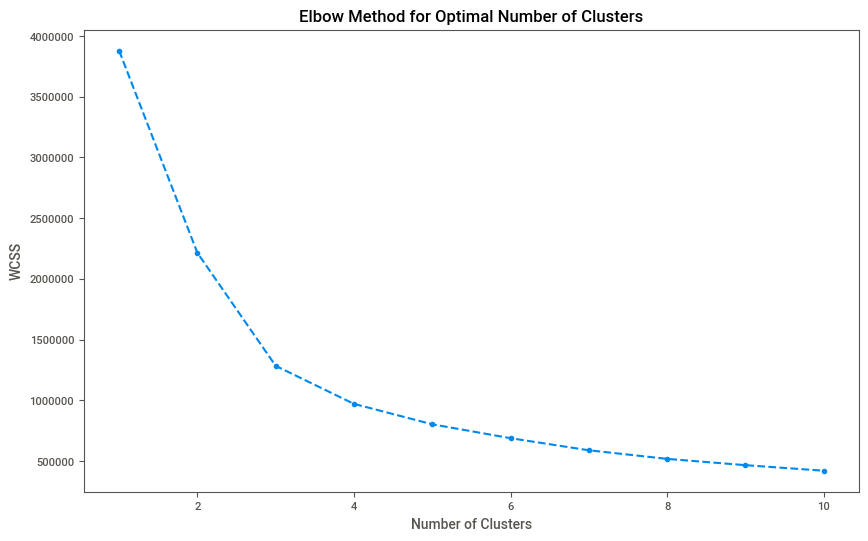

In [ ]:
# Calculating WCSS (Within-Cluster Sum of Square) for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow method results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

* The Elbow method is a fundamental technique employed to determine the optimal number of clusters for K-Means clustering. It entails generating a plot of the Within-Cluster Sum of Square (WCSS) against the number of clusters. The WCSS, in this context, quantifies the sum of squared distances between each data point and the centroid of its respective cluster.

* In the graphical representation, the inflection point, recognized as the "elbow point," denotes where the WCSS exhibits a slower rate of decrease. This key juncture denotes the optimal number of clusters, effectively striking a balance between minimizing WCSS and preventing overfitting.

* In the present scenario, the most suitable number of clusters is determined to be 4.

### Applying K-MEANS clustering with 4 clusters

In [ ]:
# Applying K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42) #random_state is set for reproducibility
clusters = kmeans.fit_predict(pca_df)

#Adding the cluster labels to the PCA DataFrame
pca_df['Cluster'] = clusters

# Displaying the first few rows of the DataFrame with cluster labels
pca_df.head()


,PC1,PC2,Cluster
0,-2.050941,2.811609,0
1,-0.905002,2.989399,0
2,2.552097,3.533376,3
3,-0.219497,3.107894,0
4,1.573378,0.140216,1


Following the transformation of the data using Principal Component Analysis (PCA), the dataset underwent clustering using the K-Means algorithm. Consequently, the resulting cluster labels were integrated into the DataFrame, introducing a new `Cluster` column that signifies the cluster assignment for each individual data point.

Next, let's visualize the clusters.

### Visualizing cluster

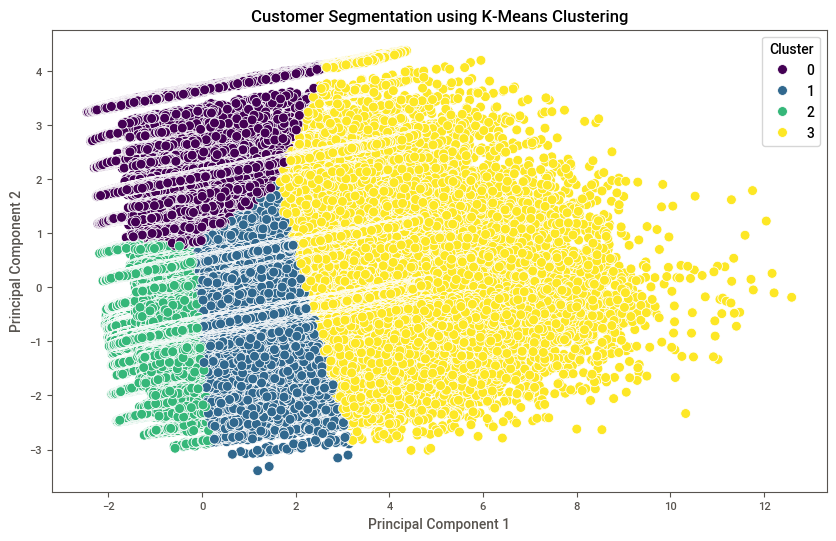

In [ ]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=50)
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

* The scatter plot illustrates the customer segmentation achieved through K-Means clustering. Each data point within the plot represents an individual customer, with distinct colors denoting the clusters identified by the K-Means algorithm.

* The x-axis and y-axis of the plot correspond to the principal components (PC1 and PC2) obtained from the PCA transformation, capturing the most significant variance in the data.

* The evident separation of clusters signifies the successful grouping of similar customers by the K-Means algorithm based on their demographic and transactional attributes.

### Evaluating the quality of the clustering

In [42]:
%%time
# Evaluating the clustering using Silhouette Score
silhouette_avg = silhouette_score(pca_df[['PC1', 'PC2']], pca_df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4418334733280782
CPU times: user 2h 2min 51s, sys: 32min 46s, total: 2h 35min 38s
Wall time: 2h 11min 13s


 * A silhouette score of ~ 0.40 indicates a fair clustering.

### Adding clusters to dataframe

In [ ]:
# Adding cluster labels to the original DataFrame
bank_df1['Cluster'] = clusters

# Displaying the first few rows of the DataFrame with cluster labels
bank_df1.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,DaysSinceLastTransaction,TransactionHour,CLV,Recency,Frequency,Monetary,Cluster
0,T1,C5841053,1994-10-01,0,JAMSHEDPUR,-0.182630,2016-02-08,143207,-0.928990,-0.222051,2.036674,-0.263451,-0.962197,2.272750,-0.513956,-0.962197,0
1,T3,C4417068,1996-11-26,0,MUMBAI,-0.180697,2016-02-08,142712,-0.117437,-0.269272,2.036674,-0.263451,-0.309475,2.272750,-0.513956,-0.309475,0
2,T5,C9031234,1988-03-24,0,NAVI MUMBAI,-0.570108,2016-02-08,181156,2.320027,-0.056777,2.036674,0.505060,1.650946,2.272750,-0.513956,1.650946,3
3,T6,C1536588,2072-08-10,0,ITANAGAR,1.066212,2016-02-08,173940,0.288340,-2.040064,2.036674,0.312932,0.016886,2.272750,-0.513956,0.016886,0
4,T7,C7126560,1992-01-26,0,MUMBAI,-0.770430,2016-02-08,173806,0.082646,-0.151219,2.036674,0.312932,0.234961,-0.814407,5.113515,0.234961,1


# Denormalizing the data

### Denormalizing the data for better understanding

In [ ]:
# Create a copy of the standardized features
scaled_features = bank_df1[features_to_scale].copy()

# Reverse the scaling using inverse_transform
bank_df1[features_to_scale] = scaler.inverse_transform(scaled_features)

# Displaying the first few rows of the denormalized dataset
bank_df1.head()


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,DaysSinceLastTransaction,TransactionHour,CLV,Recency,Frequency,Monetary,Cluster
0,T1,C5841053,1994-10-01,0,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,29.0,3125.0,14.0,25.0,3125.0,1.0,25.0,0
1,T3,C4417068,1996-11-26,0,MUMBAI,17874.44,2016-02-08,142712,459.0,27.0,3125.0,14.0,459.0,3125.0,1.0,459.0,0
2,T5,C9031234,1988-03-24,0,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,36.0,3125.0,18.0,1762.5,3125.0,1.0,1762.5,3
3,T6,C1536588,2072-08-10,0,ITANAGAR,53609.20,2016-02-08,173940,676.0,-48.0,3125.0,17.0,676.0,3125.0,1.0,676.0,0
4,T7,C7126560,1992-01-26,0,MUMBAI,973.46,2016-02-08,173806,566.0,32.0,3125.0,17.0,821.0,2881.0,4.0,821.0,1


In [ ]:
eda3 = Mleda(bank_df1)
print(eda3)

Shape of DataFrame:  (802739, 17)

Sample of Dataframe:


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,DaysSinceLastTransaction,TransactionHour,CLV,Recency,Frequency,Monetary,Cluster
675260,T882924,C9032642,1992-03-04,1,DEHRADUN,7729.84,2016-08-09,212657,527.0,32.0,2942.0,21.0,662.00,2821.0,2.0,662.00,1
241478,T313907,C7314216,1992-04-20,1,RAMANATHAPURAM,2039.77,2016-10-08,215048,10.0,32.0,2882.0,21.0,205.00,2851.0,2.0,205.00,2
792456,T1034968,C1911251,1977-05-29,0,SECUNDERABAD,8766.23,2016-09-18,163138,409.0,47.0,2902.0,16.0,1801.56,2898.0,3.0,1801.56,3
696491,T910221,C3419553,1986-02-08,1,GURGAON,43.97,2016-12-09,121101,10.0,38.0,2820.0,12.0,190.00,2820.0,2.0,190.00,2
767359,T1002369,C4694855,1982-11-28,0,MUMBAI,68257.68,2016-09-14,172859,399.0,41.0,2906.0,17.0,399.00,2906.0,1.0,399.00,2
55216,T71847,C6532673,1990-10-07,1,HYDERABAD,10.78,2016-02-08,164342,270.0,33.0,3125.0,16.0,1270.00,2905.0,2.0,1270.00,1
554397,T726769,C1241622,1981-03-07,1,TRICHY,92872.46,2016-03-09,222044,558.0,43.0,3095.0,22.0,558.00,3095.0,1.0,558.00,0
788192,T1029420,C7339838,1990-12-13,1,PUNE,34261.49,2016-09-13,115104,300.0,33.0,2907.0,11.0,590.00,2821.0,2.0,590.00,1
790955,T1032935,C4228169,1989-05-10,1,MUMBAI,25881.15,2016-09-13,5400,274.0,35.0,2907.0,0.0,352.00,2907.0,2.0,352.00,2
354062,T463184,C1017233,1800-01-01,1,PATIALA,92514.49,2016-08-16,233104,1528.0,224.0,2935.0,23.0,1528.00,2935.0,1.0,1528.00,3



There are total 3 categorical and 12 numerical columns

Description of Data:



,CustomerDOB,CustGender,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,DaysSinceLastTransaction,TransactionHour,CLV,Recency,Frequency,Monetary,Cluster
count,802739,802739.000000,802739.000000,802739,802739.000000,802739.000000,802739.000000,802739.000000,802739.000000,802739.000000,802739.000000,802739.000000,802739.000000,802739.000000
mean,1985-10-08 13:54:33.185929664,0.739086,23052.972289,2016-07-25 16:17:20.437800704,156689.588919,521.802616,38.404713,2956.321291,15.371230,664.772653,2945.368395,1.273989,664.772653,1.539563
min,1800-01-01 00:00:00,0.000000,0.000000,2016-01-08 00:00:00,1.000000,0.000000,-50.000000,2820.000000,0.000000,0.000000,2820.000000,1.000000,0.000000,0.000000
25%,1984-07-23 00:00:00,0.000000,3368.670000,2016-06-09 00:00:00,123137.000000,115.000000,32.000000,2911.000000,12.000000,170.000000,2905.000000,1.000000,170.000000,1.000000
50%,1989-03-18 00:00:00,1.000000,11669.970000,2016-08-20 00:00:00,164153.000000,307.000000,35.000000,2931.000000,16.000000,440.000000,2928.000000,1.000000,440.000000,2.000000
75%,1992-07-04 00:00:00,1.000000,30872.470000,2016-09-09 00:00:00,200339.000000,748.000000,40.000000,3003.000000,20.000000,1000.000000,2973.000000,1.000000,1000.000000,2.000000
max,2073-12-31 00:00:00,1.000000,136471.520000,2016-12-09 00:00:00,235959.000000,2309.360000,224.000000,3156.000000,23.000000,6274.000000,3156.000000,6.000000,6274.000000,3.000000
std,NaN,0.439133,28658.697751,NaN,52041.819163,534.777445,42.353947,82.820737,5.204874,664.908536,79.037156,0.533100,664.908536,0.919686


Information regarding data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802739 entries, 0 to 802738
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   TransactionID             802739 non-null  object        
 1   CustomerID                802739 non-null  object        
 2   CustomerDOB               802739 non-null  datetime64[ns]
 3   CustGender                802739 non-null  int64         
 4   CustLocation              802739 non-null  object        
 5   CustAccountBalance        802739 non-null  float64       
 6   TransactionDate           802739 non-null  datetime64[ns]
 7   TransactionTime           802739 non-null  int64         
 8   TransactionAmount (INR)   802739 non-null  float64       
 9   Age                       802739 non-null  float64       
 10  DaysSinceLastTransaction  802739 non-null  float64       
 11  TransactionHour           802739 no

None


Congrats!!, The Dataframe has NO NULL VALUES



# Summary statistics of clusters

In [ ]:
# Calculating summary statistics for each cluster
cluster_summary = bank_df1.groupby('Cluster').agg({
    'CustAccountBalance': ['mean', 'median', 'min', 'max'],
    'TransactionAmount (INR)': ['mean', 'median', 'min', 'max'],
    'Age': ['mean', 'median', 'min', 'max'],
    'DaysSinceLastTransaction': ['mean', 'median', 'min', 'max'],
    'CLV': ['mean', 'median', 'min', 'max'],
    'Recency': ['mean', 'median', 'min', 'max'],
    'Frequency': ['mean', 'median', 'min', 'max'],
    'Monetary': ['mean', 'median', 'min', 'max']
})

# Displaying the summary statistics
print(cluster_summary)


        CustAccountBalance                           TransactionAmount (INR)  \
                      mean    median  min        max                    mean   
Cluster                                                                        
0             21915.889912  11188.23  0.0  136408.58              407.660527   
1             27754.523045  15265.25  0.0  136433.08              723.799555   
2             18729.111056   9405.61  0.0  136471.52              210.655197   
3             32387.231829  19565.21  0.0  136418.50             1496.695258   

                                     Age                      \
         median  min      max       mean median   min    max   
Cluster                                                        
0         300.0  0.0  1816.00  37.858690   35.0 -50.0  224.0   
1         746.0  0.0  1727.00  40.446321   36.0 -50.0  224.0   
2         180.0  0.0   730.00  36.269284   34.0 -50.0  224.0   
3        1629.0  0.0  2309.36  43.520545   37.0 -50.0  

### Visualizing summary statistics of each cluster

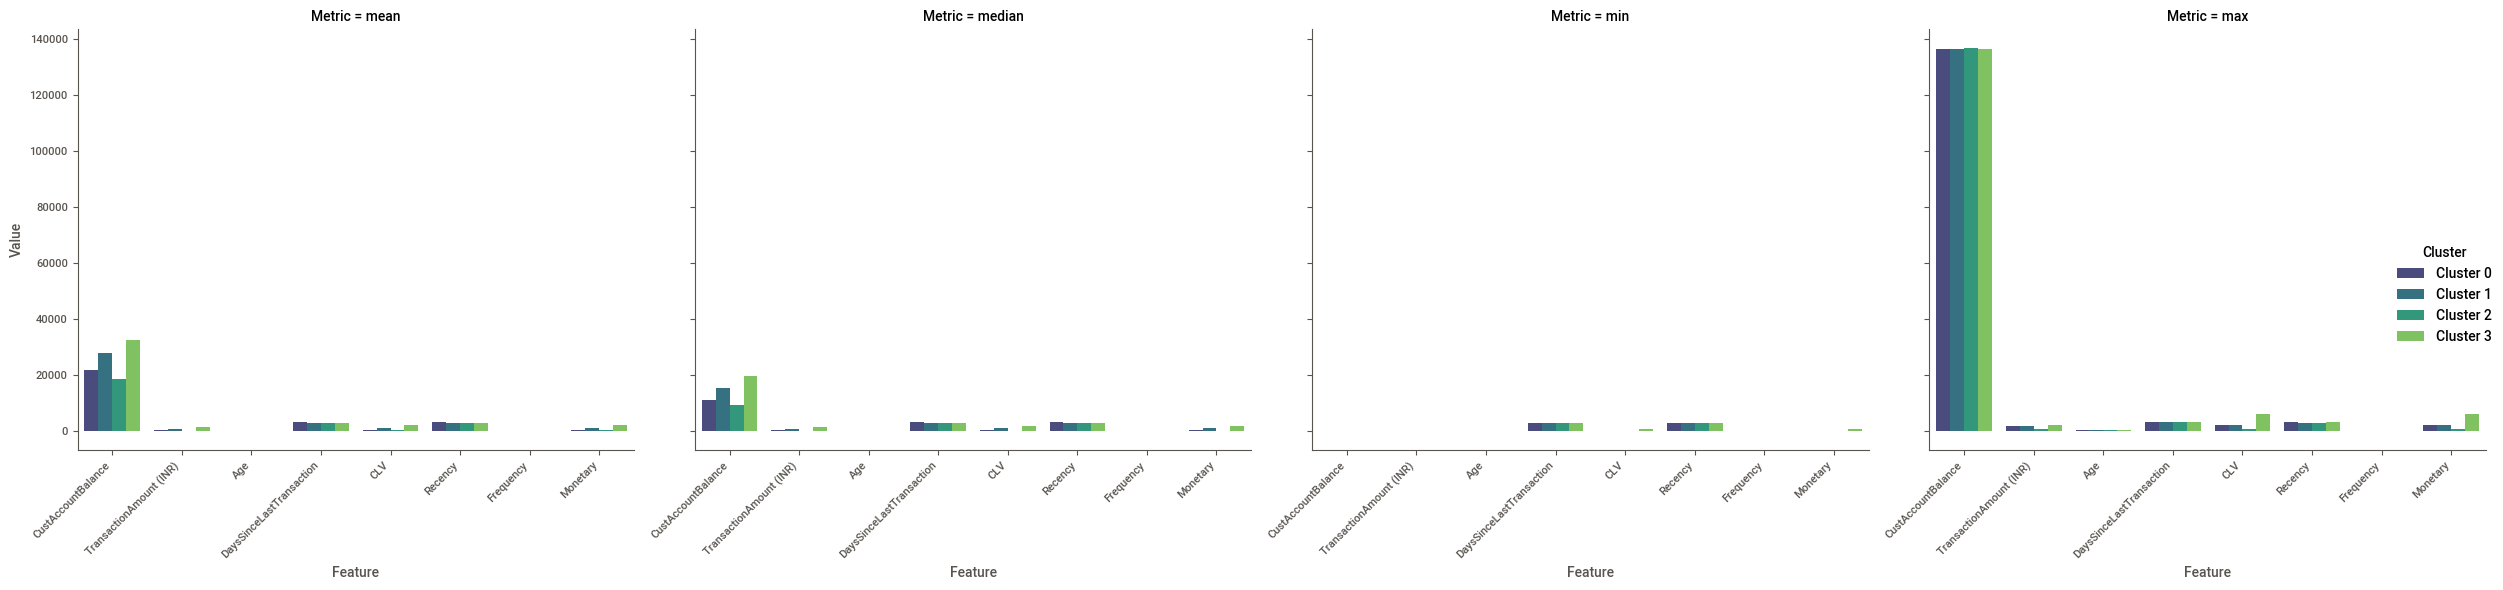

In [ ]:
# visualizing summary statistics of each cluster
# Transposing the table and flattening the column names
cluster_summary_T = cluster_summary.T.reset_index()
cluster_summary_T.columns = ['Feature', 'Metric', 'Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

# Melting the DataFrame for easier plotting
cluster_summary_melted = pd.melt(cluster_summary_T, id_vars=['Feature', 'Metric'], value_vars=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'], var_name='Cluster', value_name='Value')

# Plotting the summary statistics for each cluster
g = sns.catplot(x='Feature', y='Value', hue='Cluster', col='Metric', data=cluster_summary_melted, kind='bar', height=6, aspect = 1, palette='viridis')
g.set_xticklabels(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# EDA for the clusters

for i in range(4):
  cluster_data = bank_df1[bank_df1['Cluster'] == i]
  print(f"Cluster {i} EDA:")
  cluster_eda = Mleda(cluster_data)
  print(cluster_eda)
  print("\n")


Cluster 0 EDA:
Shape of DataFrame:  (141257, 17)

Sample of Dataframe:


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,DaysSinceLastTransaction,TransactionHour,CLV,Recency,Frequency,Monetary,Cluster
617656,T807914,C8419378,1989-09-30,1,BAHADVR GARH,12251.08,2016-04-09,221638,1047.90,34.0,3064.0,22.0,1047.90,3064.0,1.0,1047.90,0
558725,T732310,C4526141,1984-04-04,1,PAONTA SAHIB,33371.26,2016-02-09,130725,500.00,40.0,3124.0,13.0,500.00,3124.0,1.0,500.00,0
76966,T99773,C2418259,1977-02-25,1,BANKURA,45232.93,2016-01-08,185926,260.00,47.0,3156.0,18.0,260.00,3156.0,1.0,260.00,0
617689,T807954,C3216558,1988-08-08,1,NEW DELHI,14941.43,2016-05-09,203753,200.00,36.0,3034.0,20.0,200.00,3034.0,1.0,200.00,0
100215,T130662,C6327276,1977-03-27,1,KOLKATA,4798.43,2016-06-08,194435,600.00,47.0,3004.0,19.0,600.00,3004.0,1.0,600.00,0
635777,T832327,C5915467,1998-02-02,1,JAIPUR,26537.96,2016-04-09,73750,100.00,26.0,3064.0,7.0,100.00,3064.0,1.0,100.00,0
569059,T745669,C2092741,1982-10-26,1,MUMBAI,47288.78,2016-01-09,212804,118.83,41.0,3155.0,21.0,118.83,3155.0,1.0,118.83,0
111922,T145995,C2829333,1994-07-19,0,BANGALORE,3898.58,2016-05-08,181028,52.00,30.0,3035.0,18.0,302.00,3035.0,2.0,302.00,0
60681,T78933,C8524789,1985-01-15,1,NANGAL,7699.44,2016-02-08,200114,500.00,39.0,3125.0,20.0,500.00,3125.0,1.0,500.00,0
593600,T776852,C3272942,1993-08-23,0,NOIDA,133777.10,2016-06-09,182933,325.00,31.0,3003.0,18.0,325.00,3003.0,1.0,325.00,0



There are total 3 categorical and 12 numerical columns

Description of Data:



,CustomerDOB,CustGender,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,DaysSinceLastTransaction,TransactionHour,CLV,Recency,Frequency,Monetary,Cluster
count,141257,141257.000000,141257.000000,141257,141257.000000,141257.000000,141257.000000,141257.000000,141257.000000,141257.000000,141257.000000,141257.000000,141257.000000,141257.0
mean,1986-04-26 18:16:32.251003584,0.741832,21915.889912,2016-03-13 12:17:56.200117248,157162.459779,407.660527,37.858690,3090.487544,15.418521,430.792312,3082.968497,1.073051,430.792312,0.0
min,1800-01-01 00:00:00,0.000000,0.000000,2016-01-08 00:00:00,2.000000,0.000000,-50.000000,3003.000000,0.000000,0.000000,2881.000000,1.000000,0.000000,0.0
25%,1984-10-18 00:00:00,0.000000,3316.490000,2016-02-08 00:00:00,122927.000000,119.000000,32.000000,3064.000000,12.000000,140.350000,3035.000000,1.000000,140.350000,0.0
50%,1989-04-11 00:00:00,1.000000,11188.230000,2016-03-09 00:00:00,164943.000000,300.000000,35.000000,3095.000000,16.000000,313.000000,3095.000000,1.000000,313.000000,0.0
75%,1992-06-22 00:00:00,1.000000,28681.790000,2016-04-09 00:00:00,200919.000000,589.000000,39.000000,3125.000000,20.000000,613.000000,3125.000000,1.000000,613.000000,0.0
max,2073-12-28 00:00:00,1.000000,136408.580000,2016-06-09 00:00:00,235959.000000,1816.000000,224.000000,3156.000000,23.000000,2170.000000,3156.000000,3.000000,2170.000000,0.0
std,NaN,0.437628,27588.698449,NaN,52347.836172,361.259600,39.622701,47.668015,5.236007,368.732224,53.642024,0.264164,368.732224,0.0


Information regarding data: 

<class 'pandas.core.frame.DataFrame'>
Index: 141257 entries, 0 to 643691
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   TransactionID             141257 non-null  object        
 1   CustomerID                141257 non-null  object        
 2   CustomerDOB               141257 non-null  datetime64[ns]
 3   CustGender                141257 non-null  int64         
 4   CustLocation              141257 non-null  object        
 5   CustAccountBalance        141257 non-null  float64       
 6   TransactionDate           141257 non-null  datetime64[ns]
 7   TransactionTime           141257 non-null  int64         
 8   TransactionAmount (INR)   141257 non-null  float64       
 9   Age                       141257 non-null  float64       
 10  DaysSinceLastTransaction  141257 non-null  float64       
 11  TransactionHour           141257 non-nul

None


Congrats!!, The Dataframe has NO NULL VALUES



Cluster 1 EDA:
Shape of DataFrame:  (185613, 17)

Sample of Dataframe:


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,DaysSinceLastTransaction,TransactionHour,CLV,Recency,Frequency,Monetary,Cluster
617116,T807208,C2429041,1992-11-16,0,LUDHIANA,53111.20,2016-04-09,211619,582.00,31.0,3064.0,21.0,812.00,2821.0,3.0,812.00,1
797078,T1041177,C5317060,1996-11-26,0,MUMBAI,17874.44,2016-09-18,143158,660.00,27.0,2902.0,14.0,1594.00,2902.0,2.0,1594.00,1
757464,T989802,C3219319,1990-10-01,1,THANE,36880.26,2016-09-15,191110,1160.00,33.0,2905.0,19.0,1380.00,2905.0,2.0,1380.00,1
326060,T426893,C7514576,1985-02-03,0,GURGAON,110591.53,2016-08-17,183820,1295.00,39.0,2934.0,18.0,1295.00,2934.0,1.0,1295.00,1
220530,T286912,C6240917,1989-01-31,1,BANGALORE,6671.18,2016-11-08,141739,700.00,35.0,2851.0,14.0,700.00,2851.0,1.0,700.00,1
527861,T691903,C1637079,1994-07-28,1,GURGAON,2187.63,2016-08-30,184413,273.00,30.0,2921.0,18.0,823.00,2902.0,2.0,823.00,1
650549,T851499,C5834872,1990-11-27,1,GURGAON,61706.57,2016-09-09,200618,800.00,33.0,2911.0,20.0,800.00,2911.0,1.0,800.00,1
435219,T569910,C3110452,1987-10-29,1,NOIDA,21565.47,2016-08-22,182239,100.00,36.0,2929.0,18.0,587.00,2882.0,3.0,587.00,1
427186,T559229,C1464258,1988-04-28,0,NEW DELHI,1022.23,2016-08-27,185754,899.01,36.0,2924.0,18.0,899.01,2924.0,1.0,899.01,1
411940,T539451,C4617965,1980-12-08,0,MUMBAI,121369.04,2016-08-24,194547,700.00,43.0,2927.0,19.0,700.00,2927.0,1.0,700.00,1



There are total 3 categorical and 12 numerical columns

Description of Data:



,CustomerDOB,CustGender,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,DaysSinceLastTransaction,TransactionHour,CLV,Recency,Frequency,Monetary,Cluster
count,185613,185613.000000,185613.000000,185613,185613.000000,185613.000000,185613.000000,185613.000000,185613.000000,185613.000000,185613.000000,185613.000000,185613.000000,185613.0
mean,1983-09-22 17:34:19.362221440,0.719341,27754.523045,2016-08-22 19:32:45.450695680,161247.549918,723.799555,40.446321,2928.185585,15.826919,989.995741,2909.505466,1.524376,989.995741,1.0
min,1800-01-01 00:00:00,0.000000,0.000000,2016-01-08 00:00:00,1.000000,0.000000,-50.000000,2820.000000,0.000000,184.180000,2820.000000,1.000000,184.180000,1.0
25%,1983-04-19 00:00:00,0.000000,4723.320000,2016-08-14 00:00:00,131312.000000,444.000000,32.000000,2905.000000,13.000000,750.000000,2893.000000,1.000000,750.000000,1.0
50%,1988-05-29 00:00:00,1.000000,15265.250000,2016-08-24 00:00:00,171203.000000,746.000000,36.000000,2927.000000,17.000000,983.000000,2921.000000,1.000000,983.000000,1.0
75%,1992-01-27 00:00:00,1.000000,39670.010000,2016-09-15 00:00:00,201117.000000,1000.000000,41.000000,2937.000000,20.000000,1195.000000,2933.000000,2.000000,1195.000000,1.0
max,2073-12-31 00:00:00,1.000000,136433.080000,2016-12-09 00:00:00,235959.000000,1727.000000,224.000000,3156.000000,23.000000,2350.000000,3065.000000,5.000000,2350.000000,1.0
std,NaN,0.449323,31538.365153,NaN,49081.201807,382.897419,48.090283,58.238462,4.909455,304.000646,40.606586,0.645283,304.000646,0.0


Information regarding data: 

<class 'pandas.core.frame.DataFrame'>
Index: 185613 entries, 4 to 802737
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   TransactionID             185613 non-null  object        
 1   CustomerID                185613 non-null  object        
 2   CustomerDOB               185613 non-null  datetime64[ns]
 3   CustGender                185613 non-null  int64         
 4   CustLocation              185613 non-null  object        
 5   CustAccountBalance        185613 non-null  float64       
 6   TransactionDate           185613 non-null  datetime64[ns]
 7   TransactionTime           185613 non-null  int64         
 8   TransactionAmount (INR)   185613 non-null  float64       
 9   Age                       185613 non-null  float64       
 10  DaysSinceLastTransaction  185613 non-null  float64       
 11  TransactionHour           185613 non-nul

None


Congrats!!, The Dataframe has NO NULL VALUES



Cluster 2 EDA:
Shape of DataFrame:  (377353, 17)

Sample of Dataframe:


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,DaysSinceLastTransaction,TransactionHour,CLV,Recency,Frequency,Monetary,Cluster
604134,T790292,C5920413,2068-02-05,0,DEHRADUN,20030.34,2016-06-09,102939,198.0,-44.0,3003.0,10.0,198.0,3003.0,1.0,198.0,2
771840,T1008140,C6618070,1992-11-19,1,BANGALORE,0.66,2016-09-14,181834,132.0,31.0,2906.0,18.0,132.0,2906.0,1.0,132.0,2
707496,T924089,C8330447,1989-08-04,1,JHAJJAR,13656.25,2016-11-09,131550,60.0,35.0,2850.0,13.0,130.0,2850.0,2.0,130.0,2
759362,T992165,C8636689,1991-04-01,1,BANGALORE,104.51,2016-09-15,212844,10.0,33.0,2905.0,21.0,10.0,2905.0,1.0,10.0,2
351543,T459823,C7129843,1996-05-09,1,JAIPUR,6487.87,2016-08-21,63155,200.0,28.0,2930.0,6.0,200.0,2930.0,1.0,200.0,2
403153,T528177,C4529877,1995-06-19,1,GURGAON,2056.61,2016-08-24,234607,447.0,29.0,2927.0,23.0,447.0,2927.0,1.0,447.0,2
320587,T419729,C8316835,1988-07-31,0,ALLAHABAD,1282.34,2016-08-18,225810,106.0,36.0,2933.0,22.0,106.0,2933.0,1.0,106.0,2
690228,T902006,C6063463,1978-03-01,1,KOLKATA,18005.02,2016-07-09,80656,500.0,46.0,2973.0,8.0,500.0,2973.0,1.0,500.0,2
170410,T221426,C4110716,1991-05-02,1,NEW DELHI,36333.57,2016-08-08,204852,413.0,33.0,2943.0,20.0,413.0,2943.0,1.0,413.0,2
139960,T182226,C7727138,1996-08-17,1,DELHI,106220.85,2016-09-08,132111,300.0,28.0,2912.0,13.0,300.0,2912.0,1.0,300.0,2



There are total 3 categorical and 12 numerical columns

Description of Data:



,CustomerDOB,CustGender,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,DaysSinceLastTransaction,TransactionHour,CLV,Recency,Frequency,Monetary,Cluster
count,377353,377353.000000,377353.000000,377353,377353.000000,377353.000000,377353.000000,377353.000000,377353.000000,377353.000000,377353.000000,377353.00000,377353.000000,377353.0
mean,1987-11-28 15:35:17.767713600,0.759276,18729.111056,2016-09-01 09:34:17.378634240,152466.353531,210.655197,36.269284,2918.601188,14.948926,234.708701,2914.271428,1.13101,234.708701,2.0
min,1800-01-01 00:00:00,0.000000,0.000000,2016-01-08 00:00:00,1.000000,0.000000,-50.000000,2820.000000,0.000000,0.000000,2820.000000,1.00000,0.000000,2.0
25%,1985-09-15 00:00:00,1.000000,2466.070000,2016-08-16 00:00:00,115438.000000,66.000000,31.000000,2905.000000,11.000000,97.000000,2902.000000,1.00000,97.000000,2.0
50%,1989-11-01 00:00:00,1.000000,9405.610000,2016-08-26 00:00:00,160721.000000,180.000000,34.000000,2925.000000,16.000000,200.000000,2924.000000,1.00000,200.000000,2.0
75%,1992-10-09 00:00:00,1.000000,23884.770000,2016-09-15 00:00:00,195412.000000,301.000000,38.000000,2935.000000,19.000000,353.750000,2934.000000,1.00000,353.750000,2.0
max,2073-12-31 00:00:00,1.000000,136471.520000,2016-12-09 00:00:00,235959.000000,730.000000,224.000000,3156.000000,23.000000,821.000000,3004.000000,4.00000,821.000000,2.0
std,NaN,0.427524,24913.219073,NaN,54160.271065,165.675725,35.537622,42.510502,5.416061,171.393655,38.126938,0.34767,171.393655,0.0


Information regarding data: 

<class 'pandas.core.frame.DataFrame'>
Index: 377353 entries, 65 to 802736
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   TransactionID             377353 non-null  object        
 1   CustomerID                377353 non-null  object        
 2   CustomerDOB               377353 non-null  datetime64[ns]
 3   CustGender                377353 non-null  int64         
 4   CustLocation              377353 non-null  object        
 5   CustAccountBalance        377353 non-null  float64       
 6   TransactionDate           377353 non-null  datetime64[ns]
 7   TransactionTime           377353 non-null  int64         
 8   TransactionAmount (INR)   377353 non-null  float64       
 9   Age                       377353 non-null  float64       
 10  DaysSinceLastTransaction  377353 non-null  float64       
 11  TransactionHour           377353 non-nu

None


Congrats!!, The Dataframe has NO NULL VALUES



Cluster 3 EDA:
Shape of DataFrame:  (98516, 17)

Sample of Dataframe:


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,DaysSinceLastTransaction,TransactionHour,CLV,Recency,Frequency,Monetary,Cluster
731515,T955920,C7136190,1986-04-16,0,BANGALORE,18147.42,2016-10-09,163750,1871.00,38.0,2881.0,16.0,1871.00,2881.0,1.0,1871.00,3
269871,T351884,C4815112,1986-10-02,1,CHENNAI,63499.97,2016-08-14,114954,1100.00,37.0,2937.0,11.0,2100.00,2937.0,2.0,2100.00,3
687849,T899025,C1522375,1988-01-12,1,BANGALORE,75.57,2016-07-09,114425,2245.00,36.0,2973.0,11.0,2245.00,2973.0,1.0,2245.00,3
792372,T1034864,C4057954,1990-11-15,1,BAHADURGARH,163.54,2016-09-18,165926,2020.00,33.0,2902.0,16.0,2020.00,2902.0,1.0,2020.00,3
300811,T394204,C7434986,1985-06-26,0,NEW DELHI,523.30,2016-08-13,211527,805.50,39.0,2938.0,21.0,1805.50,2938.0,2.0,1805.50,3
417511,T546521,C2041852,1993-05-06,0,PUNE,66136.25,2016-08-24,214416,1528.00,31.0,2927.0,21.0,1528.00,2927.0,1.0,1528.00,3
636051,T832703,C1837988,1987-01-31,1,PATHANAMTHITTA,7538.32,2016-04-09,115307,2040.00,37.0,3064.0,11.0,2844.00,2869.0,2.0,2844.00,3
792982,T1035638,C1137767,1982-12-25,1,HARIDWAR,15454.18,2016-09-18,172735,1349.00,41.0,2902.0,17.0,2577.00,2902.0,2.0,2577.00,3
187665,T244382,C2735827,1986-03-03,1,IMPHAL,3984.40,2016-07-08,192741,1043.00,38.0,2974.0,19.0,1588.00,2881.0,3.0,1588.00,3
520958,T683064,C5527977,1987-07-20,0,THANE,50969.89,2016-08-31,213645,1683.78,37.0,2920.0,21.0,1913.78,2920.0,2.0,1913.78,3



There are total 3 categorical and 12 numerical columns

Description of Data:



,CustomerDOB,CustGender,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,DaysSinceLastTransaction,TransactionHour,CLV,Recency,Frequency,Monetary,Cluster
count,98516,98516.000000,98516.000000,98516,98516.000000,98516.000000,98516.000000,98516.000000,98516.000000,98516.000000,98516.000000,98516.000000,98516.000000,98516.0
mean,1980-08-23 21:18:04.428925248,0.695014,32387.231829,2016-07-20 13:27:07.885825536,163600.521245,1496.695258,43.520545,2961.439492,16.062447,2034.820673,2934.752680,1.638018,2034.820673,3.0
min,1800-01-01 00:00:00,0.000000,0.000000,2016-01-08 00:00:00,1.000000,0.000000,-50.000000,2820.000000,0.000000,812.010000,2820.000000,1.000000,812.010000,3.0
25%,1982-01-24 00:00:00,0.000000,6420.342500,2016-06-08 00:00:00,133504.750000,1190.000000,32.000000,2912.000000,13.000000,1692.847500,2902.000000,1.000000,1692.847500,3.0
50%,1987-08-05 00:00:00,1.000000,19565.210000,2016-08-17 00:00:00,172554.500000,1629.000000,37.000000,2934.000000,17.000000,1974.500000,2926.000000,1.000000,1974.500000,3.0
75%,1991-10-26 00:00:00,1.000000,48240.340000,2016-09-08 00:00:00,201237.000000,1975.000000,42.000000,3004.000000,20.000000,2220.000000,2938.000000,2.000000,2220.000000,3.0
max,2073-12-31 00:00:00,1.000000,136418.500000,2016-12-09 00:00:00,235959.000000,2309.360000,224.000000,3156.000000,23.000000,6274.000000,3156.000000,6.000000,6274.000000,3.0
std,NaN,0.460404,33872.915751,NaN,47004.054583,587.382583,55.849931,80.892118,4.701930,507.491226,68.649577,0.762441,507.491226,0.0


Information regarding data: 

<class 'pandas.core.frame.DataFrame'>
Index: 98516 entries, 2 to 802738
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TransactionID             98516 non-null  object        
 1   CustomerID                98516 non-null  object        
 2   CustomerDOB               98516 non-null  datetime64[ns]
 3   CustGender                98516 non-null  int64         
 4   CustLocation              98516 non-null  object        
 5   CustAccountBalance        98516 non-null  float64       
 6   TransactionDate           98516 non-null  datetime64[ns]
 7   TransactionTime           98516 non-null  int64         
 8   TransactionAmount (INR)   98516 non-null  float64       
 9   Age                       98516 non-null  float64       
 10  DaysSinceLastTransaction  98516 non-null  float64       
 11  TransactionHour           98516 non-null  float64     

None


Congrats!!, The Dataframe has NO NULL VALUES





Detailed summary:

Cluster 0:
- Average Gender: 0.74 (approximately 74% male)
- Average Account Balance: 21915.88 INR
- Average Transaction Amount: 407.66 INR
- Average Age: 38 years
- Average Days Since Last Transaction: 3090.49 days
- Average Transaction Hour: 15.41 (approximately 3 PM)
- Average Customer Lifetime Value (CLV): 430.79 INR
- Average Recency: 3082.97 days
- Average Frequency: 1.07 transactions
- Average Monetary: 430.79 INR

Cluster 1:
- Average Gender: 0.72 (approximately 72% male)
- Average Account Balance: 27754.52 INR
- Average Transaction Amount: 723.80 INR
- Average Age: 40.45 years
- Average Days Since Last Transaction: 2928.19 days
- Average Transaction Hour: 15.82 (approximately 4 PM)
- Average Customer Lifetime Value (CLV): 990 INR
- Average Recency: 2909.51 days
- Average Frequency: 1.52 transactions
- Average Monetary: 990 INR

Cluster 2:
- Average Gender: 0.76 (approximately 76% male)
- Average Account Balance: 18729.11 INR
- Average Transaction Amount: 210.66 INR
- Average Age: 36.27 years
- Average Days Since Last Transaction: 2918.60 days
- Average Transaction Hour: 14.94 (approximately 3 PM)
- Average Customer Lifetime Value (CLV): 234.71 INR
- Average Recency: 2914.27 days
- Average Frequency: 1.31 transactions
- Average Monetary: 234.71 INR

Cluster 3:
- Average Gender: 0.69 (approximately 69% male)
- Average Account Balance: 32387.23 INR
- Average Transaction Amount: 1496.70 INR
- Average Age: 43.52 years
- Average Days Since Last Transaction: 2961.44 days
- Average Transaction Hour: 16.06 (approximately 4 PM)
- Average Customer Lifetime Value (CLV): 2034.82 INR
- Average Recency: 2934.75 days
- Average Frequency: 1.63 transactions
- Average Monetary: 2034.82 INR

These summaries highlight the key characteristics of each customer segment, providing insights into their demographics and transaction behaviors.

# Average distribution plots of each customer segment using key demographic and transactional features

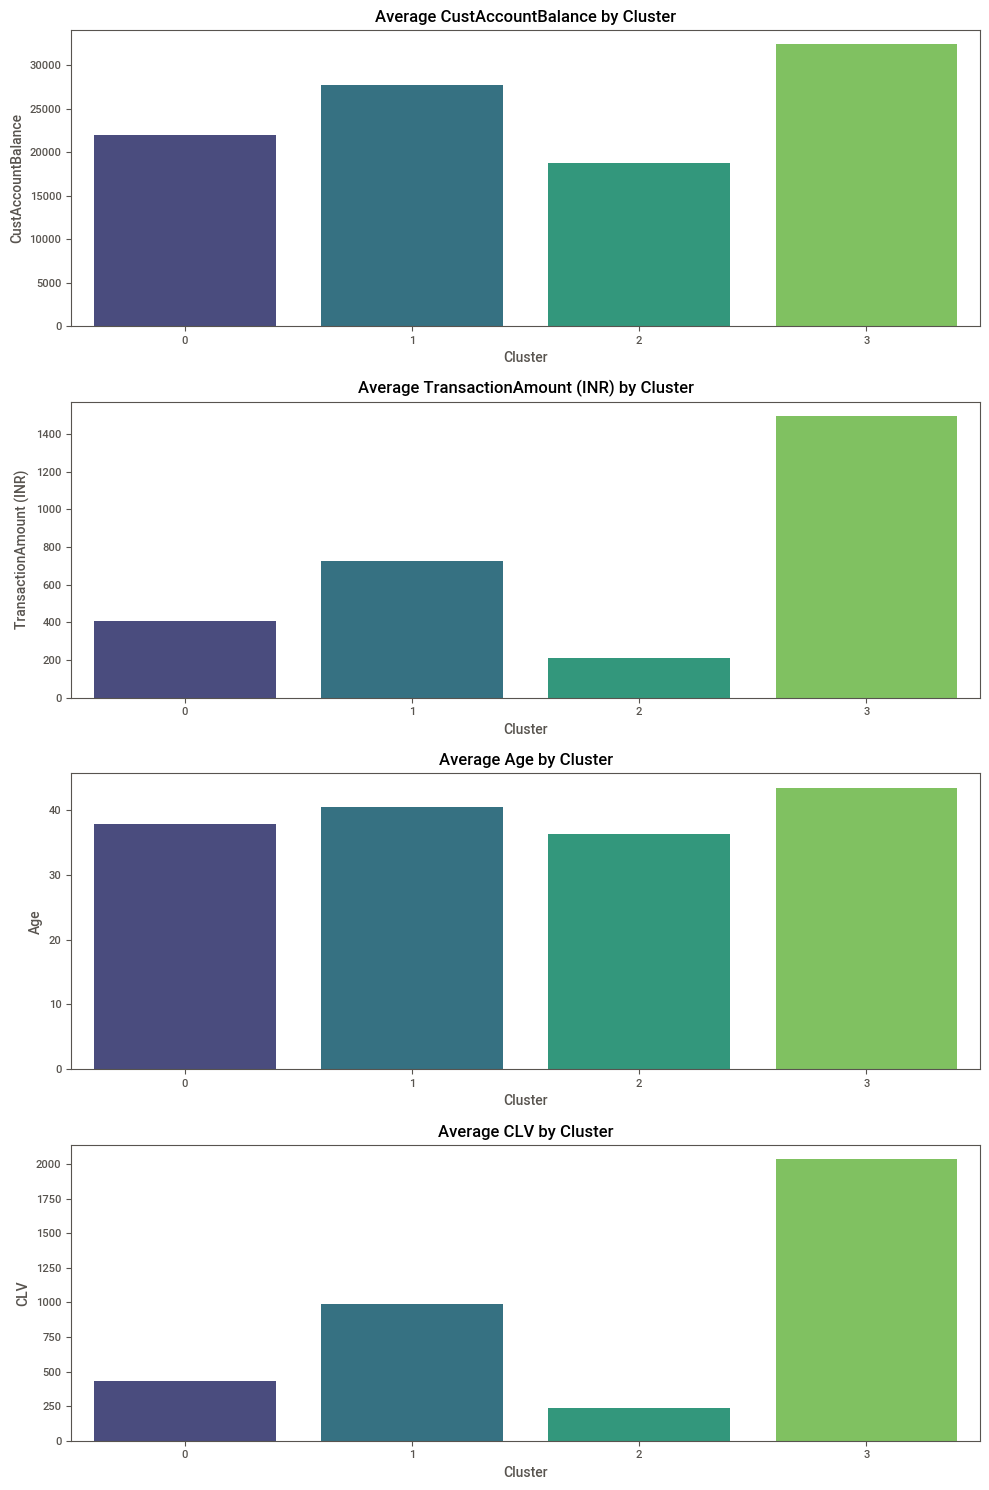

In [44]:
# Calculate average values for each cluster
cluster_means = bank_df1.groupby('Cluster').agg({
    'CustAccountBalance': 'mean',
    'TransactionAmount (INR)': 'mean',
    'Age': 'mean',
    'DaysSinceLastTransaction': 'mean',
    'CLV': 'mean'

})

# Select features for plotting
features = ['CustAccountBalance', 'TransactionAmount (INR)', 'Age', 'CLV']

# Plotting
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(10, 15))

for i, feature in enumerate(features):
    sns.barplot(x=cluster_means.index, y=cluster_means[feature], ax=axes[i], palette='viridis')
    axes[i].set_title(f'Average {feature} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()
plt.savefig('cluster_means.jpg')
plt.close()

Explanation:

The bar charts present the distribution of critical demographic and transactional features across distinct customer segments identified through K-Means clustering. The charts encompass:

1. Average Age by Customer Segment: Depicting the average age of customers in each cluster to gain insights into age distribution across varied segments.

2. Average Account Balance by Customer Segment: This chart illustrates the average account balance for customers in each cluster to provide perspectives on the financial status of diverse customer segments.

3. Average Transaction Amount by Customer Segment: This section displays the average transaction amount for customers in each cluster, facilitating the identification of spending behavior in different segments.

4. Average Customer Lifetime Value (CLV) by Customer Segment: This section showcases the average CLV for customers in each cluster, a pivotal metric for comprehending the long-term value of customers to the bank.

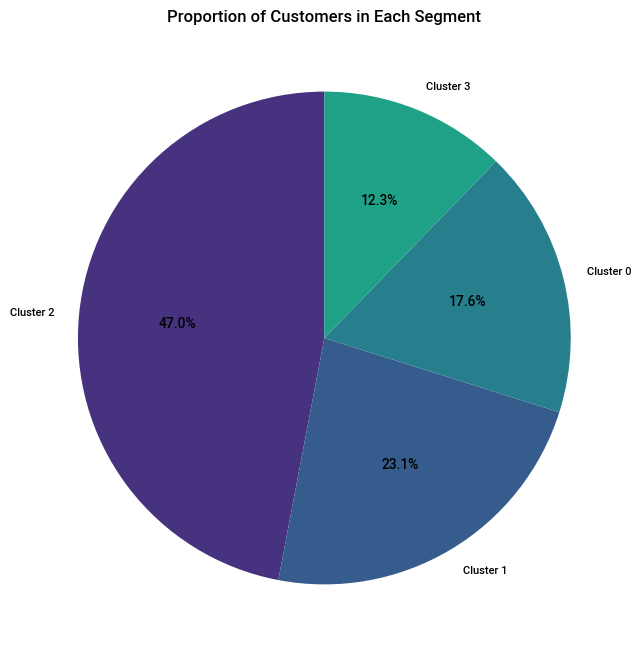

In [ ]:
# Calculate the size of each cluster
cluster_sizes = bank_df1['Cluster'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_sizes, labels=[f'Cluster {i}' for i in cluster_sizes.index], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Proportion of Customers in Each Segment')
plt.show()
plt.savefig('segmentation_chart.png')

In [ ]:
# prompt: saving and exporting the pie chart visualization
plt.savefig('pie_chart.png')


The clusters have been categorized as follows:

Cluster 0: Emerging Value Customers
- Description: Customers with emerging potential, moderate account balance, and moderate transaction amount. They are relatively younger and have few transactions.
- Average Age: 38 years
- Average Account Balance: 21915.88 INR
- Average Transaction Amount: 407.66 INR
- Average CLV: 430.79 INR
- Average Frequency: 1.07

Cluster 1: Moderate Value Customers
- Description: Customers with moderate account balance, slightly high transaction amount, and moderate CLV. They are middle-aged and have a high number of transactions.
- Average Age: 40.45 years
- Average Account Balance: 27754.52 INR
- Average Transaction Amount: 723.80 INR
- Average CLV: 1,995.74 INR
- Average Frequency: 1.63

Cluster 2: Low Value Customers
- Description: Customers with low account balance, low transaction amount, and low CLV. They are relatively younger and have few transactions.
- Average Age: 36.27 years
- Average Account Balance: 18729.11 INR
- Average Transaction Amount: 210.66 INR
- Average CLV: 234.71 INR
- Average Frequency: 1.31

Cluster 3: High Value Customers
- Description: Customers with high account balance, high transaction amount, and high CLV. They are older and have more frequent transactions.
- Average Age: 43.52 years
- Average Account Balance: 32387.23 INR
- Average Transaction Amount: 1496.70 INR
- Average CLV: 2034.82 INR
- Average Frequency: 1.63

Marketing Strategies:

The following marketing strategies have been devised to cater to the specific needs and preferences of each customer cluster:

* Low Value Customers
Our primary focus for low value customers is centered on engagement and retention. Personalized services and incentives will be offered to increase transaction frequency and account balance. Furthermore, the provision of educational content on financial management aims to facilitate informed decision-making and enhance financial well-being.

* High Value Customers
The marketing plan for high value customers entails the provision of premium services and exclusive offers to uphold and augment customer satisfaction. Implementation of loyalty programs and the offering of personalized financial advice serve to ensure the retention of these esteemed customers.

* Moderate Value Customers
Our strategy for moderate value customers aims to stimulate higher engagement and spending through targeted promotions and discounts. Additionally, personalized recommendations and bespoke financial products will be offered to address individual needs and preferences.

* Emerging Customers
In cultivating the potential growth of emerging customers, our strategy involves the identification and nurturing of their potential. This includes the offering of introductory incentives and personalized support to foster higher engagement. Moreover, educational resources will be provided to facilitate the expansion of their financial portfolios.

# Saving the clusters into meaningful formats

In [45]:
# Saving the cluster labels to a new CSV file
bank_df1.to_csv('bank_data_with_clusters.csv', index=False)

cluster_emerging_customers = bank_df1[bank_df1['Cluster'] == 0]
cluster_emerging_customers.to_csv('emerging_customers.csv', index=False)

cluster_moderate_value_customers = bank_df1[bank_df1['Cluster'] == 1]
cluster_moderate_value_customers.to_csv('moderate_value_customers.csv', index=False)

cluster_low_value_customers = bank_df1[bank_df1['Cluster'] == 2]
cluster_low_value_customers.to_csv('low_value_customers.csv', index=False)

cluster_high_value_customers = bank_df1[bank_df1['Cluster'] == 3]
cluster_high_value_customers.to_csv('high_value_customers.csv', index=False)





Key Business Opportunities
Outlined below are the principal business opportunities for each customer cluster:

Low-Value Customers
1. Implementing financial literacy programs to educate customers on effective financial management.
2. Introduction of low-cost financial products and services to enhance customer engagement.
3. Execution of loyalty programs aimed at incentivizing and rewarding frequent transactions.

High-Value Customers
1. Provision of exclusive premium services and personalized financial advice tailored to the specific needs of high-value customers.
2. Development of loyalty programs featuring high-value rewards to retain these valuable customer segments effectively.
3. Early access to new financial products and investment opportunities enriches their investment portfolio.

Moderate Value Customers
1. Introduction of targeted promotions and discounts to stimulate higher spending and engagement.
2. Offering personalized financial products and services to address their specific needs and preferences effectively.
3. Implement referral programs to leverage moderate engagement for new customer acquisition.

Emerging Customers
1. Identify and nurture potential high-value customers through personalized support and guidance.
2. Provision of introductory offers and incentives to enhance engagement and interest levels.
3. Provide educational resources and financial planning tools to facilitate their financial portfolio growth.

Follow-Up Analyses:

The following are potential follow-up analyses or additional data that could enhance customer segmentation insights:

`Customer Feedback and Satisfaction`: Incorporating customer feedback and satisfaction scores to understand customer experience's qualitative aspects and identify improvement areas.

`Churn Prediction`: Development of a churn prediction model to identify customers at risk of leaving the bank, enabling the implementation of proactive retention strategies for vulnerable segments.

`Behavioural Analysis`: Analyzing customer behaviour patterns such as transaction frequency over time, preferred transaction channels, and types of transactions to gain deeper insights into customer preferences and habits.

`Time Series Analysis`: Conducting time series analysis to identify trends and seasonality in customer transactions, thereby facilitating forecasting future behaviour and planning of marketing campaigns accordingly.

`Product Usage Analysis`: Examining various financial products and services usage patterns among customer segments to identify cross-selling and upselling opportunities.

`Geospatial Analysis`: Conducting geospatial analysis to identify regional trends and opportunities, tailoring marketing strategies and product offerings based on geographic location.

`Credit Score Analysis`: Incorporating credit score data to assess customers' creditworthiness and risk profiles, aiding in making informed lending decisions and offering appropriate credit products.

`Social Media and Digital Footprints`: Analyzing customers' social media activity and digital footprint to gain insights into their interests, preferences, and online behaviour, enhancing personalized marketing efforts.

`Life Stage Segmentation`: Segmenting customers based on their life stages (e.g., students, young professionals, families, retirees) to offer relevant financial products and services tailored to their specific needs.

`Income and Employment Data`: Incorporating additional demographic data such as income levels, employment status, and occupation to provide a more comprehensive understanding of customers' financial situations and needs.



**Summary**

During this project, we aimed to categorize the bank's clientele into distinct clusters by leveraging their demographic and transactional data. The fundamental steps and accomplishments of the project are enumerated as follows:

Data Cleaning and Preprocessing:
- Rectification of missing data and identification of outliers in the dataset.
- Transformation of pertinent columns into suitable data types.
- Introduction of novel features such as Age, DaysSinceLastTransaction, TransactionHour, and Customer Lifetime Value (CLV).

Dimensionality Reduction:
- Employment of Principal Component Analysis (PCA) to lessen the data's dimensionality, facilitating visual representation and clustering.

Customer Segmentation:
- Implement K-Means clustering to partition customers into four noticeable clusters: Low-value customers, high-value customers, moderate-value customers, and emerging customers.
- Production of comprehensive summaries and visual representations for each customer segment, accentuating key traits such as average age, account balance, and transactional conduct.

Marketing Strategies:
- Formulated personalized marketing strategies for every customer segment to amplify engagement, retention, and advancement.

Business Opportunities:
- Identification of pivotal business prospects for each cluster to drive customer value and enhance financial outcomes.

Data Export:
- The segmented dataset and individual cluster files are preserved for subsequent analysis and bank usage.

**Conclusion**

The customer segmentation model distinguished discrete customer groups based on demographic and transactional behaviours. These discernments empower the bank to personalize marketing strategies, refine product offerings, and enrich customer engagement. By comprehending each customer segment's unique attributes and requisites, the bank can implement tailored initiatives to elevate customer contentment and profitability. Additionally, the project pinpointed potential follow-up analyses and supplementary data that could fortify the customer segmentation insights, presenting a pathway for future enhancements.